# Libraries

In [1]:
# The Libraries that we need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library

#Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

# Git the Data

In [2]:
!git clone https://github.com/intern2grow/sales-data-analysis.git

fatal: destination path 'sales-data-analysis' already exists and is not an empty directory.


# About the Data

The dataset you will be using is a CSV file called sales_data.csv. It contains information about sales made by a fictional company over the course of a year. The columns in the dataset are as follows:

- date: The date of the sale (in YYYY-MM-DD format)

- product: The name of the product sold

- category: The category of the product (e.g. "electronics", "clothing", etc.)

- price: The price of the product (in USD)

- quantity: The quantity of the product sold

- revenue: The total revenue generated by the sale (i.e. price * quantity)

# Data Cleaning

## Upload the Data

In [3]:
data = pd.read_csv('/content/sales-data-analysis/sales_data.csv')

In [4]:
data

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


## Look at the Data

In [5]:
# Take a look at the head of the data.
data.head(10)

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
5,2022-01-05,Watch,Accessories,150.0,10.0,1500.0
6,2022-01-06,Smartphone,Electronics,600.0,8.0,4800.0
7,2022-01-06,Tablet,Electronics,400.0,5.0,2000.0
8,2022-01-07,Coat,Clothing,100.0,10.0,1000.0
9,2022-01-08,Smartwatch,Accessories,200.0,12.0,2400.0


In [6]:
# Take a look at the tail of the data.
data.tail()

,date,product,category,price,quantity,revenue
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0
368,2022-12-31,Hoodie,Clothing,40.0,30.0,1200.0


In [7]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
data.shape

(369, 6)

In [8]:
# Look at the columns names.
data.columns

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

In [9]:
# Let's check the data, to see if there is duplicate data or not
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
364    False
365    False
366    False
367    False
368    False
Length: 369, dtype: bool

In [10]:
# We are looking for duplicate rows.
data.duplicated().sum()

1

In [11]:
# Checking for missing values
data.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [12]:
data.isnull()

,date,product,category,price,quantity,revenue
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
364,False,False,False,False,False,False
365,False,False,False,False,False,False
366,False,False,False,False,False,False
367,False,False,False,False,False,False


In [13]:
# To select only the rows with NaN values, we can use the 'any()' method
data[pd.isnull(data).any(axis=1)]

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [14]:
# Use the .info() method to find out how many entries there are.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [15]:
# We are looking for types of the columns in the data.
data.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [16]:
# To know and see the number of components or the number of sample of each column in this data.
data.nunique()

date        365
product      14
category      8
price        11
quantity     19
revenue      31
dtype: int64

## Data Tuning and Initialization

### Change type of date column

In [17]:
# convert the 'Date' column to datetime format
data['date'] = data['date'].astype('datetime64[ns]')
 
# Check the format of 'Date' column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    object        
 3   price     367 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.4+ KB


### Remove tha Duplicated Rows

In [18]:
# We removed the repeating rows, so as not to affect the model build to work with the data, but kept one row of them.
gt = data.drop_duplicates(keep='last')
gt

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [19]:
# Take a look at the form (shape) of the new data (Dimensions of Dataset) after tuning.
gt.shape

(368, 6)

### Fill the Missing data

In [20]:
# We will fill NaN values with a mean for all weight values.
gt['price'] = gt['price'].fillna(gt['price'].mean())

In [21]:
gt['quantity'] = gt['quantity'].fillna(gt['quantity'].mean())

In [22]:
# Fill all NaN values with price * quantity (200.0 * 10.0)
gt['revenue'] = gt['revenue'].fillna(200.0 * 10.0)

In [23]:
# Check
gt.isnull()

,date,product,category,price,quantity,revenue
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
364,False,False,False,False,False,False
365,False,False,False,False,False,False
366,False,False,False,False,False,False
367,False,False,False,False,False,False


In [24]:
gt.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

# Data Visualization

In [25]:
# Matrix form for correlation data
drrr= gt.corr()
drrr

,price,quantity,revenue
price,1.000000,-0.509322,0.914544
quantity,-0.509322,1.000000,-0.311213
revenue,0.914544,-0.311213,1.000000


<Axes: >

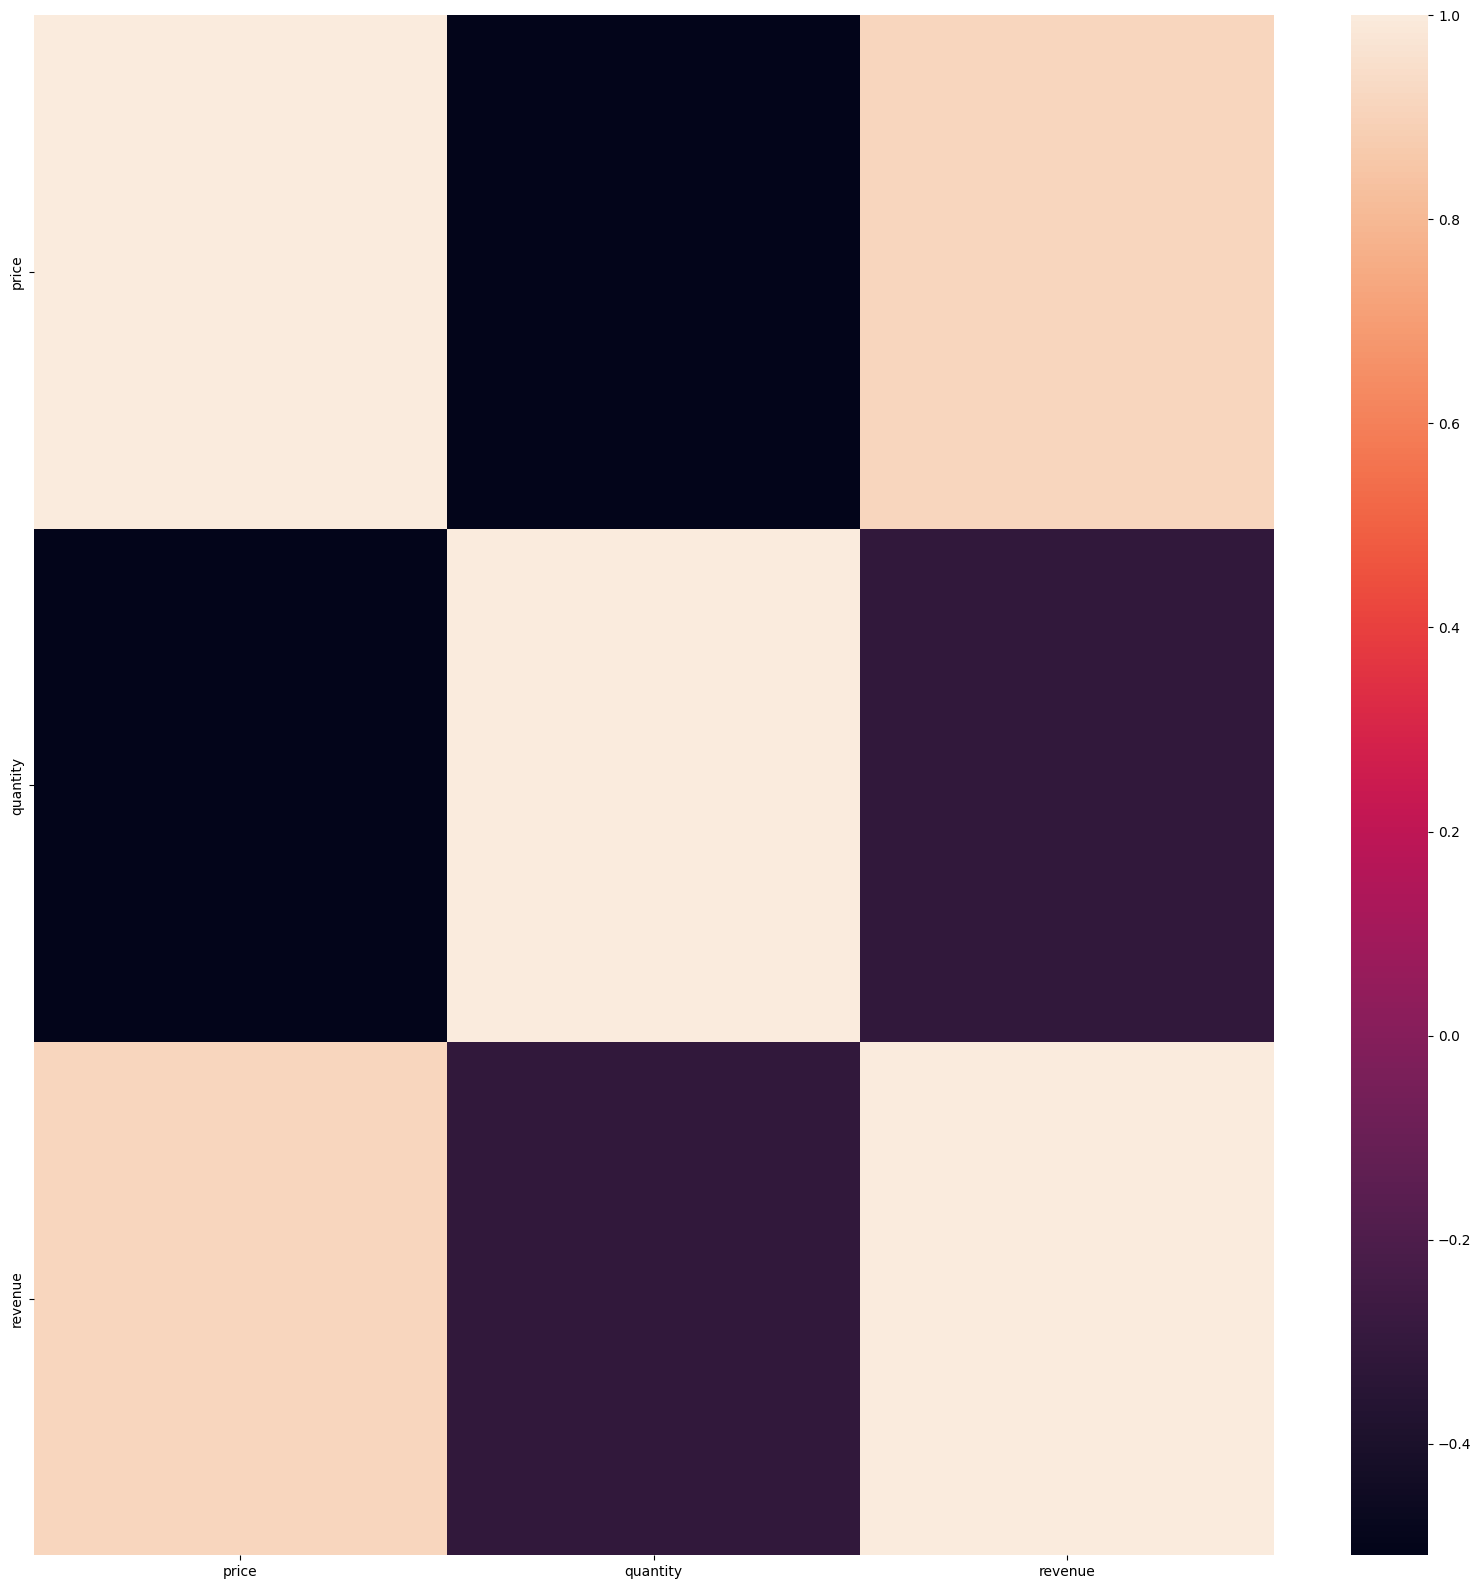

In [26]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<Axes: >

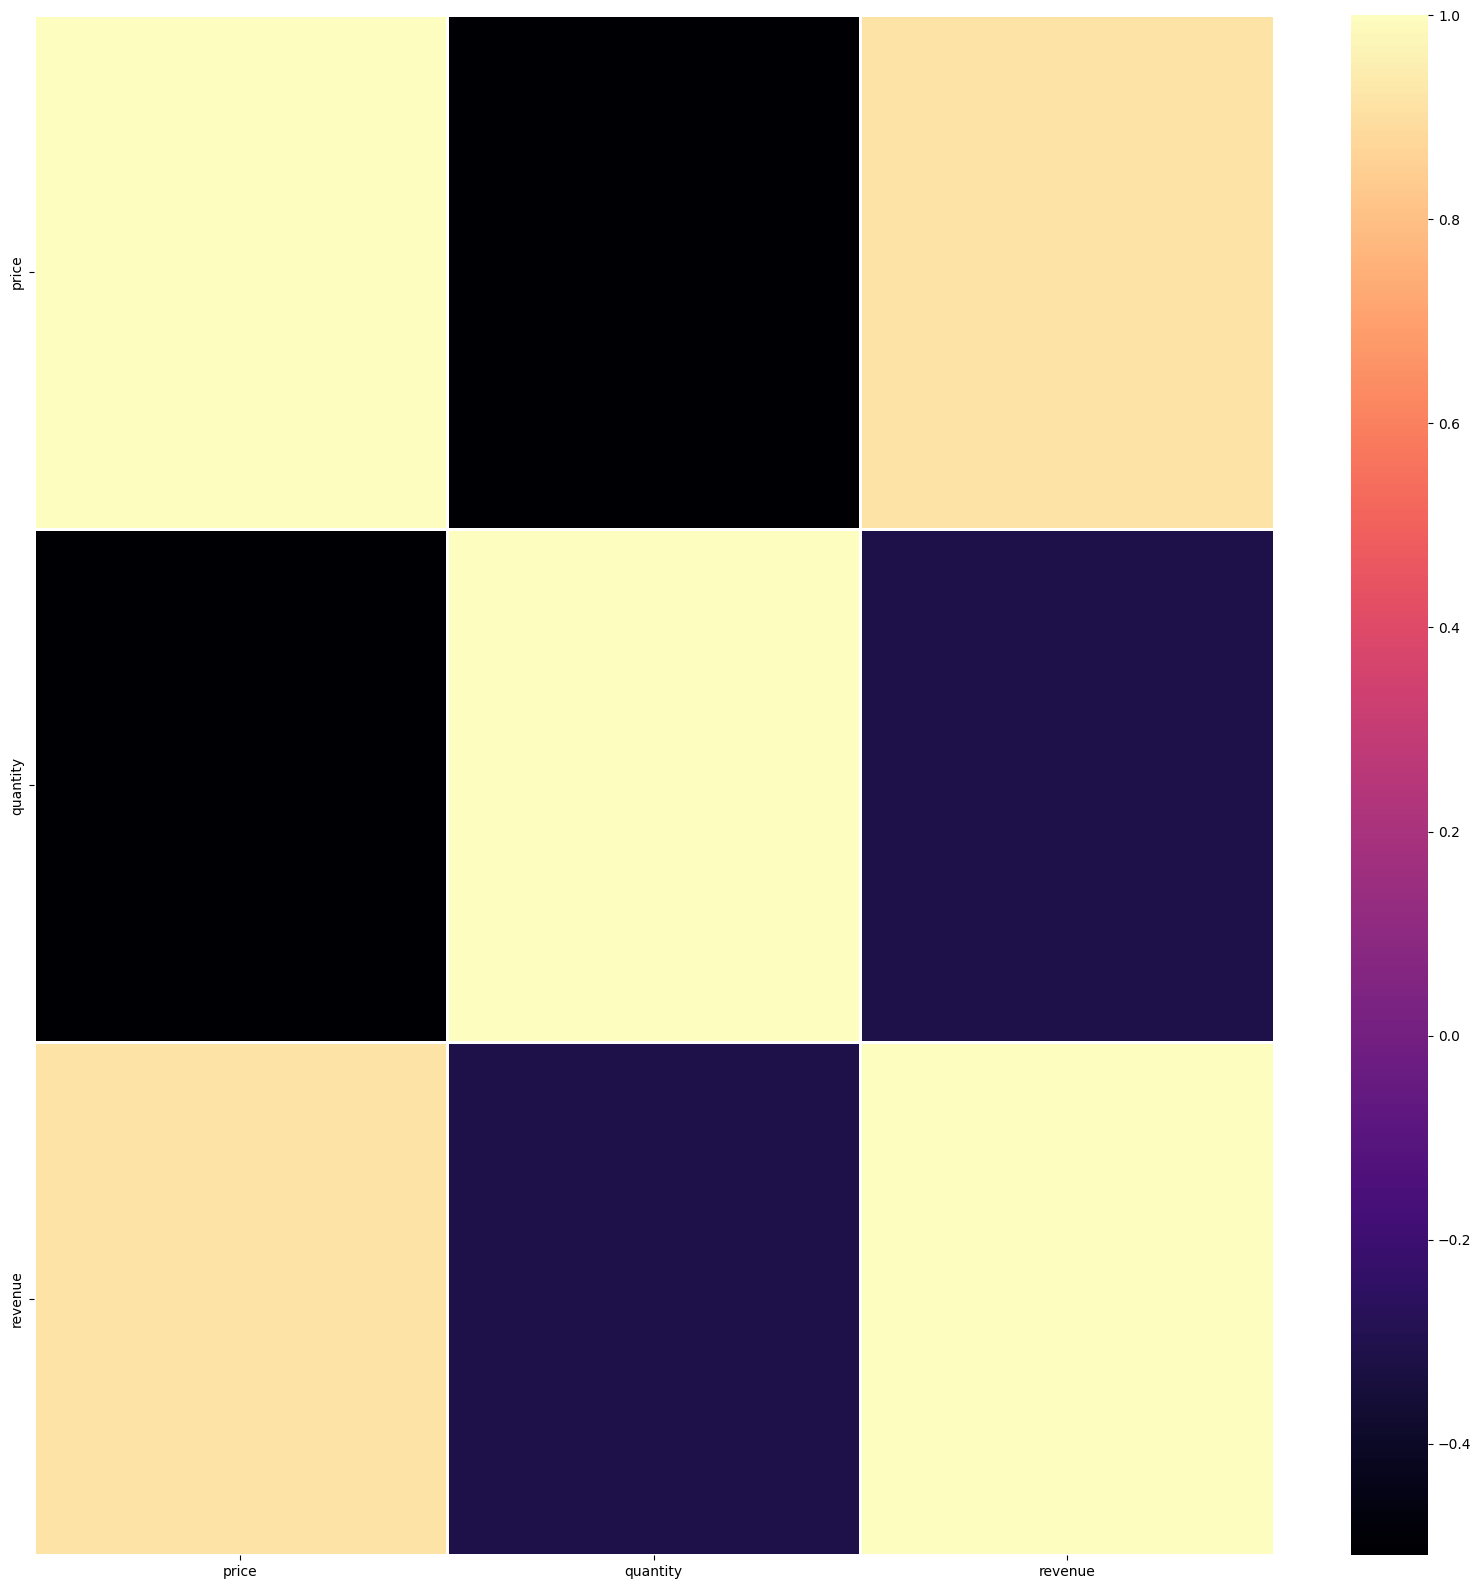

In [27]:
# Another method to looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr,cmap='magma',linecolor='white',linewidths=1)

<Axes: >

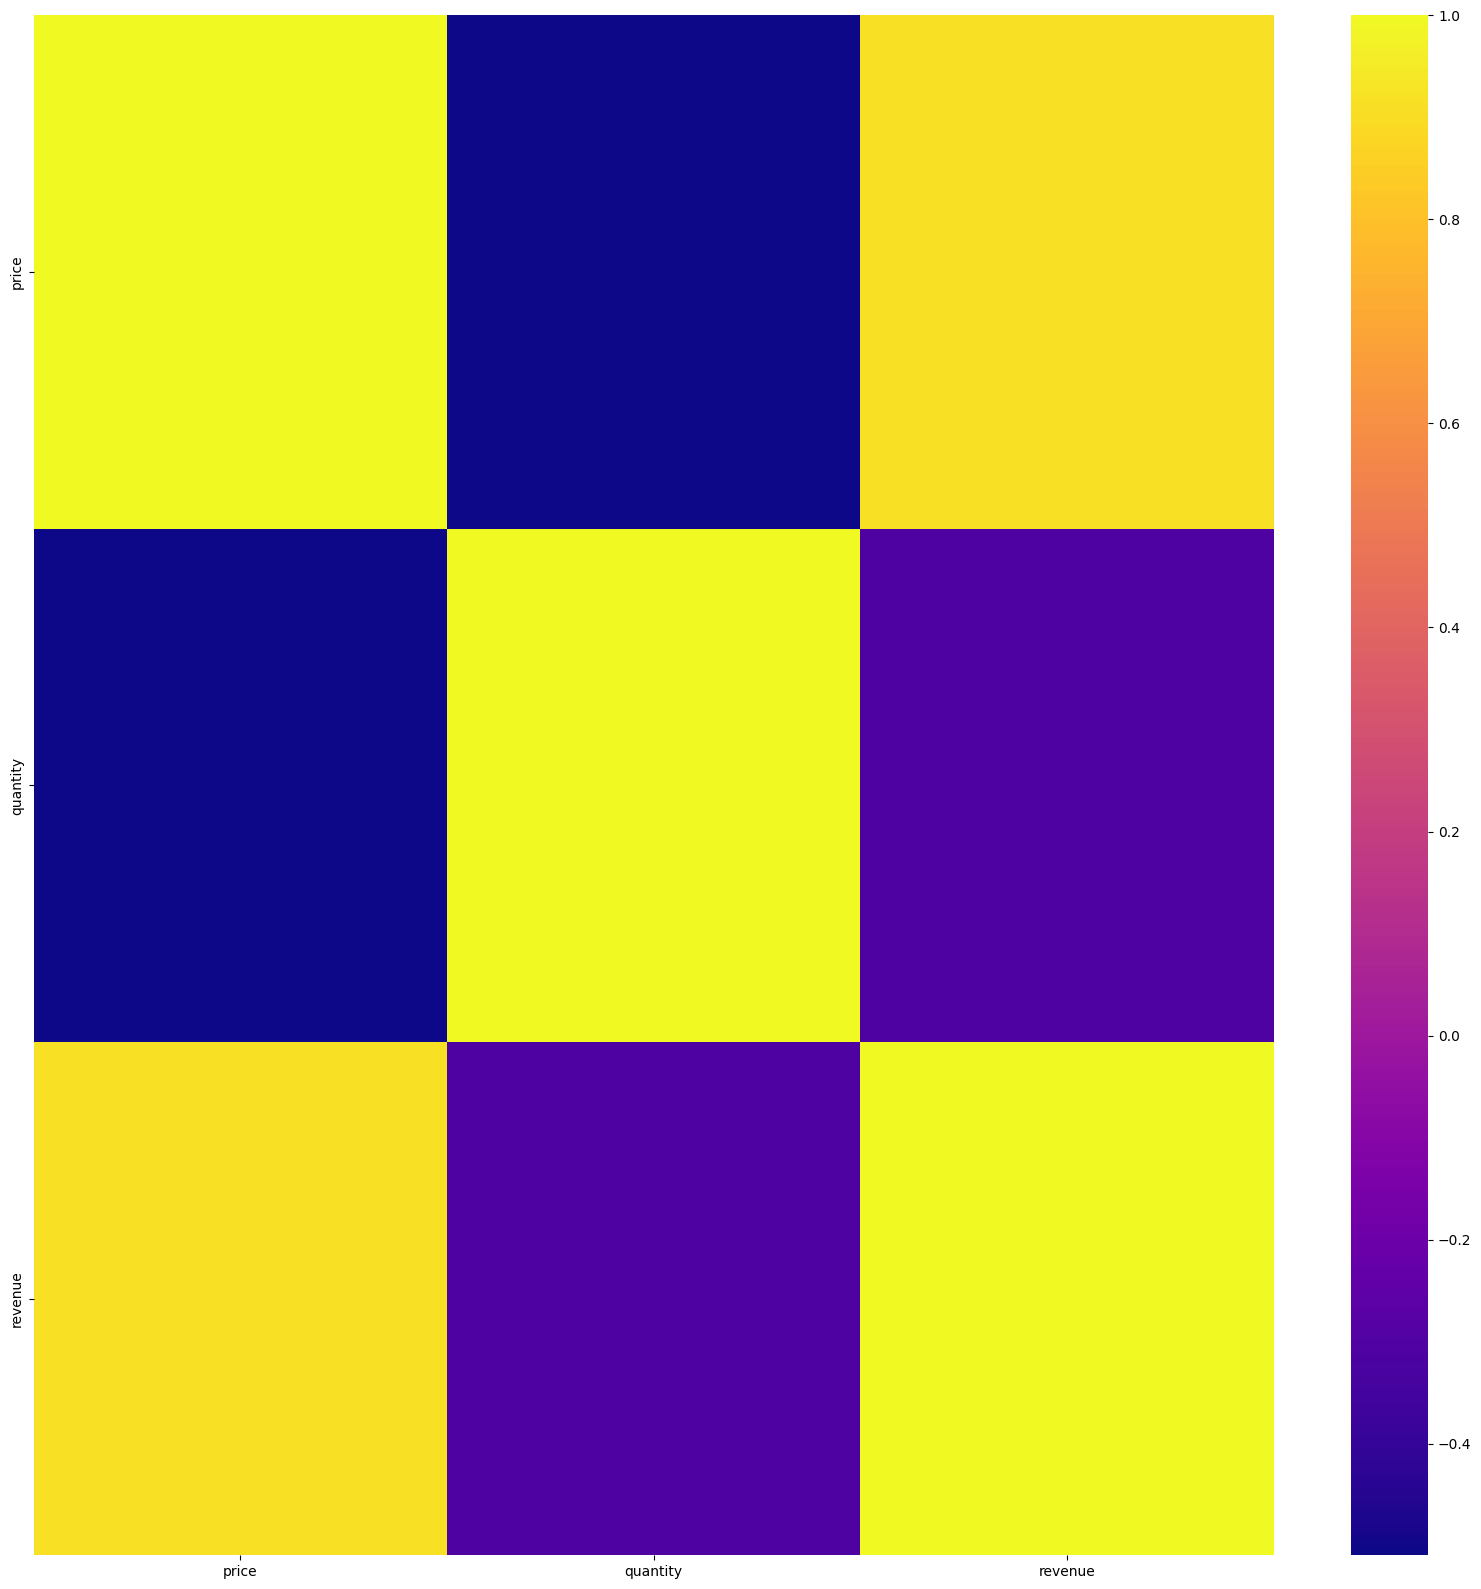

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(drrr,cmap='plasma',)

<Axes: >

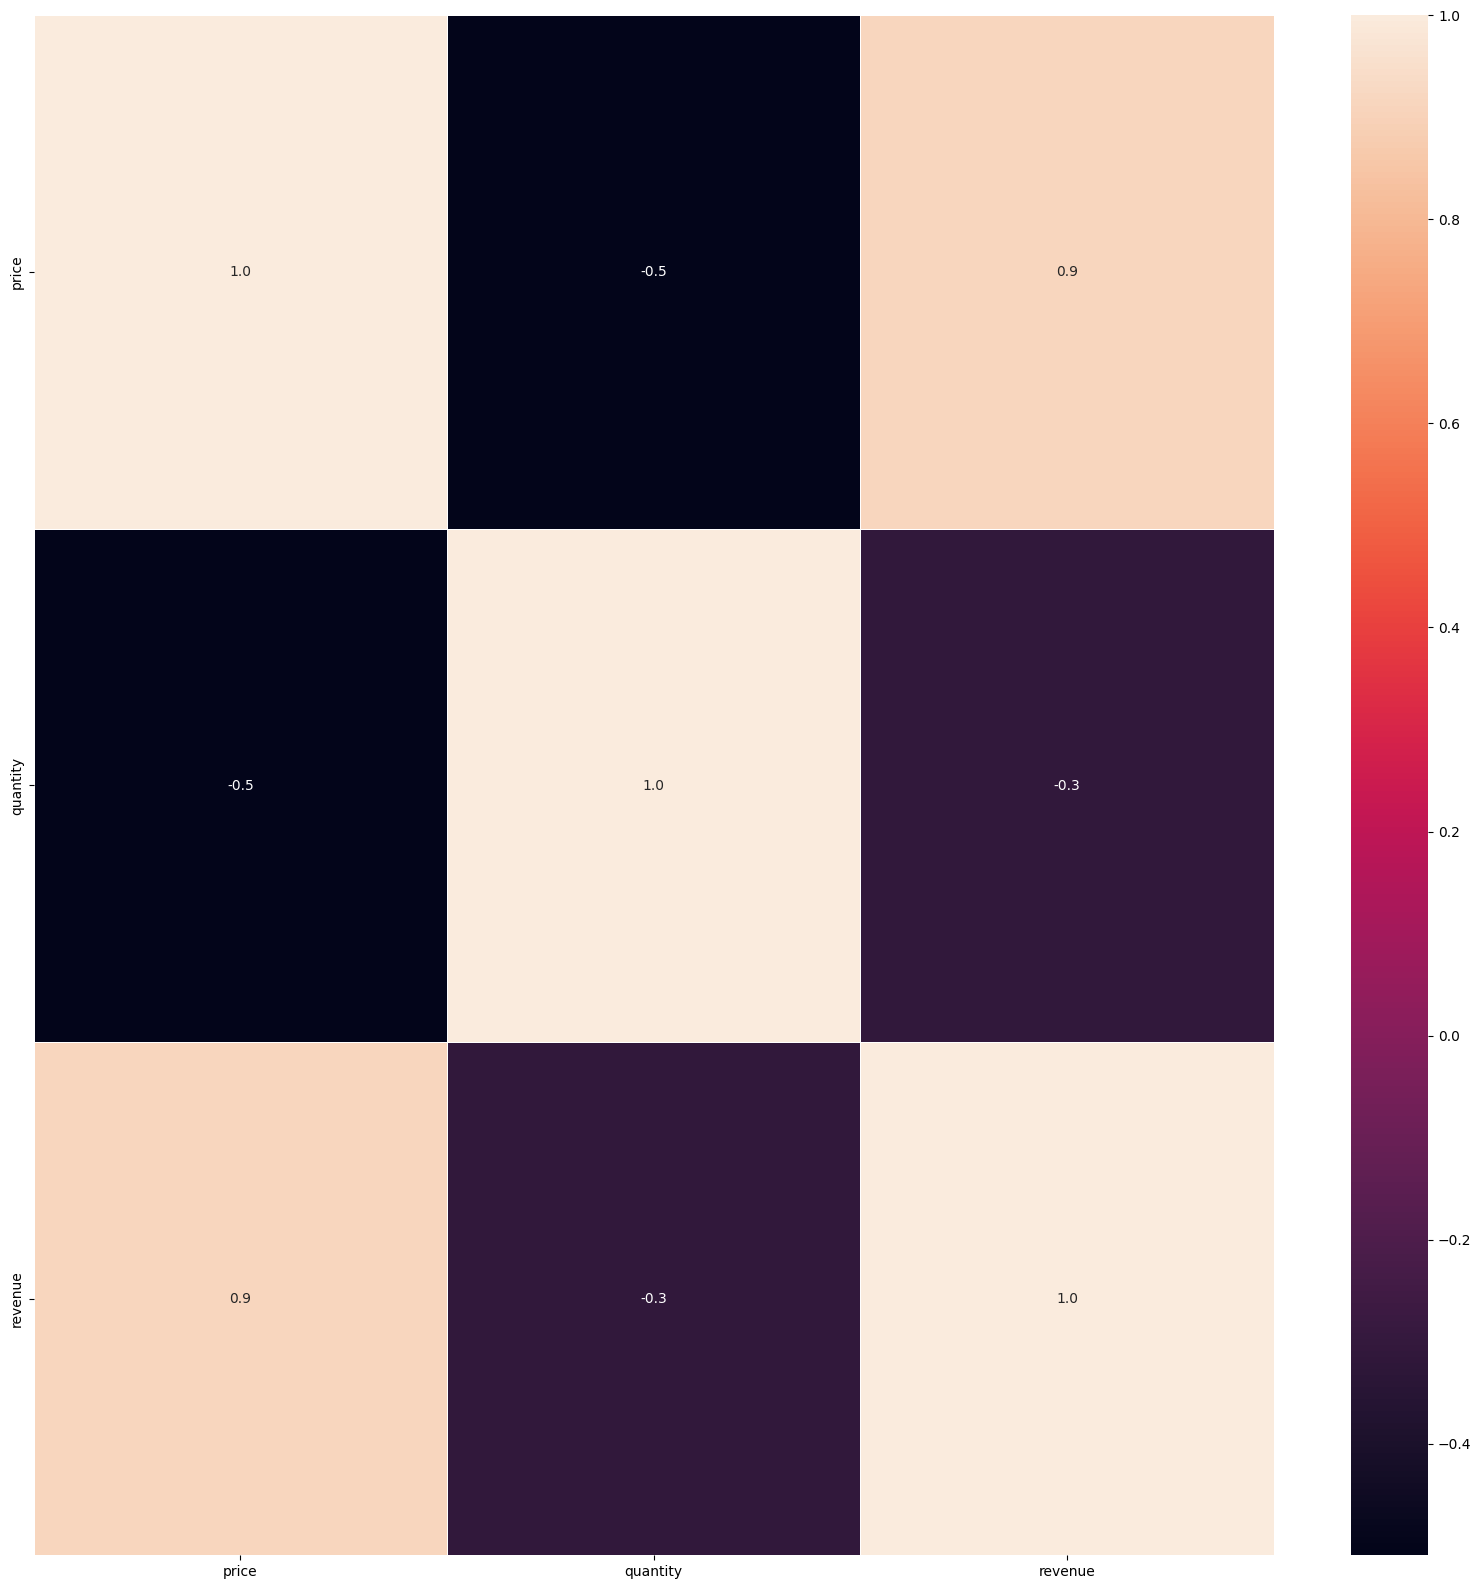

In [29]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

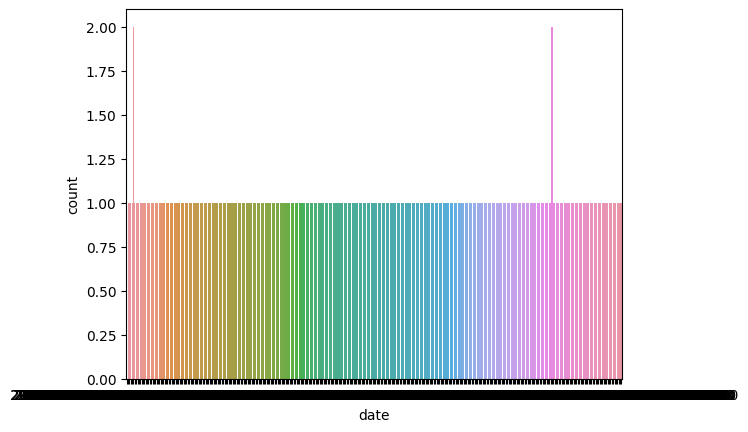

<Figure size 2000x2000 with 0 Axes>

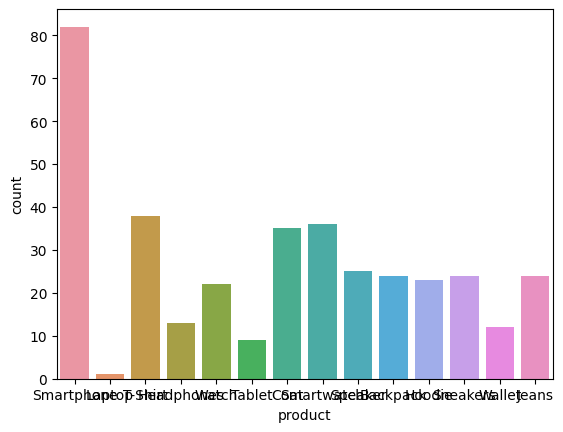

<Figure size 2000x2000 with 0 Axes>

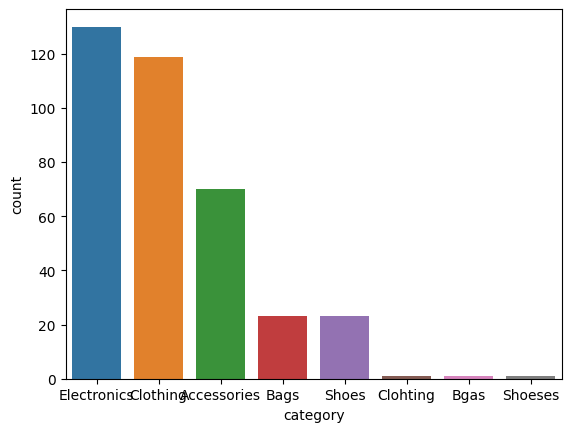

<Figure size 2000x2000 with 0 Axes>

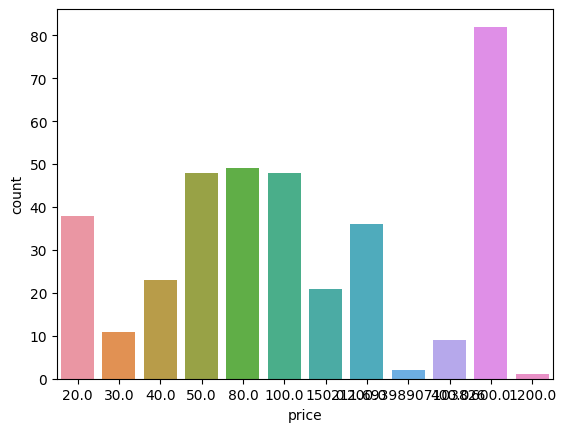

<Figure size 2000x2000 with 0 Axes>

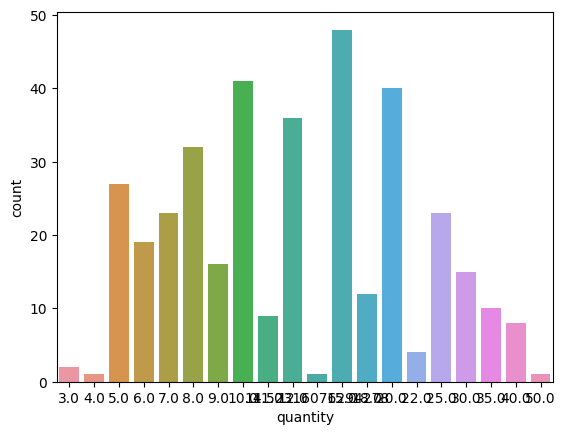

<Figure size 2000x2000 with 0 Axes>

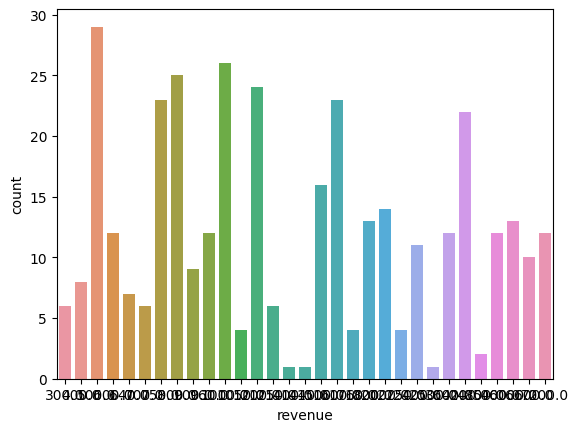

<Figure size 2000x2000 with 0 Axes>

In [30]:
# Original data.
for i in gt.loc[:, ~gt.columns.isin(["DEATH", "AGE"])]:
    f = sns.countplot(x=gt[i]);
    plt.figure(figsize=(20,20))
    plt.show()

# Data Analysis

## Generat a copy from the data

In [31]:
df = gt.copy()
df

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


## 1.  What was the total revenue generated by the company over the course of the year?

In [32]:
q= df["revenue"].sum()
q

759130.0

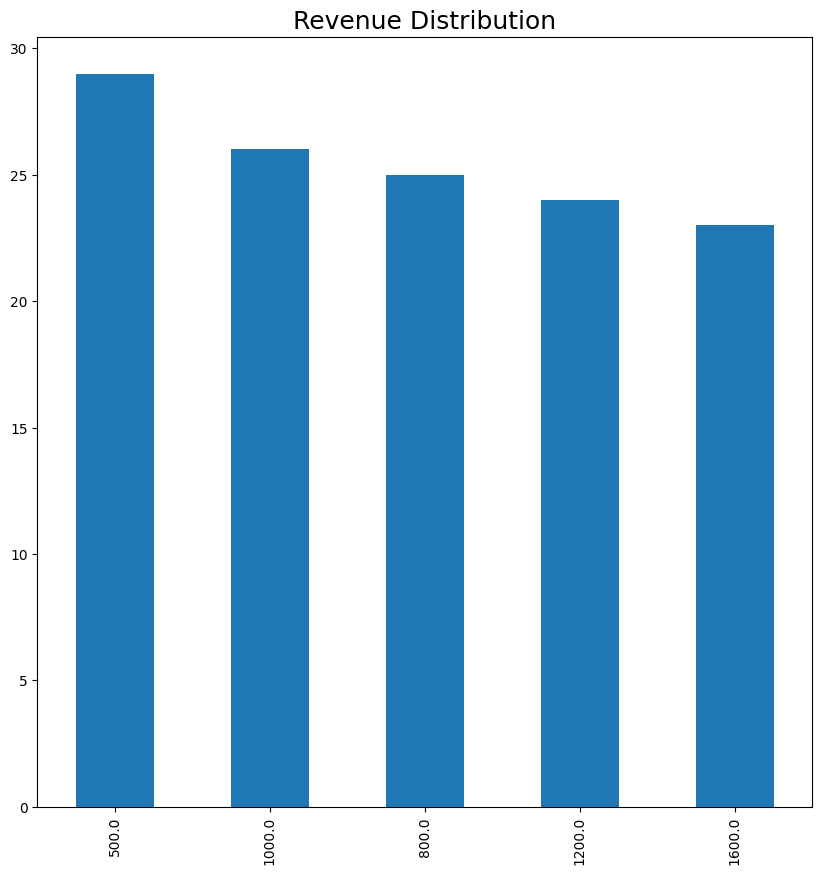

In [33]:
plt.figure(figsize=(10,10))
df['revenue'].value_counts().nlargest().plot(kind='bar')
plt.title("Revenue Distribution", fontsize=18);

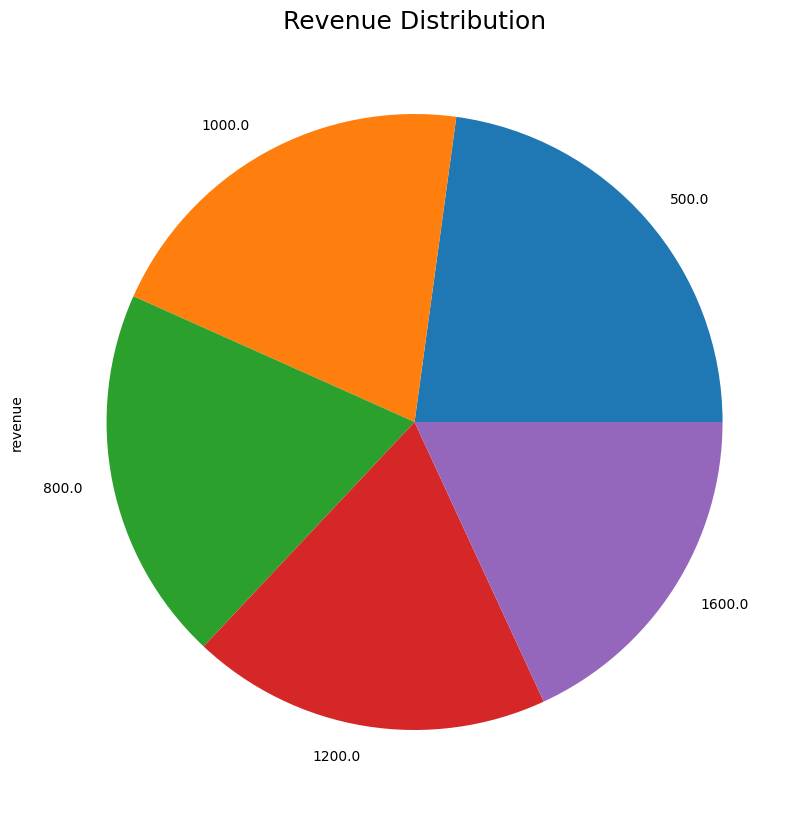

In [34]:
plt.figure(figsize=(10,10))
df['revenue'].value_counts().nlargest().plot(kind='pie')
plt.title("Revenue Distribution", fontsize=18);

## 2. Which product had the highest revenue? How much revenue did it generate?

In [35]:
df['revenue'].max()

7200.0

In [36]:
filtered_revenue = df[(df['revenue'] == 7200.0)]
filtered_revenue

,date,product,category,price,quantity,revenue
13,2022-01-12,Smartphone,Electronics,600.0,12.0,7200.0
44,2022-02-12,Smartphone,Electronics,600.0,12.0,7200.0
72,2022-03-12,Smartphone,Electronics,600.0,12.0,7200.0
103,2022-04-12,Smartphone,Electronics,600.0,12.0,7200.0
134,2022-05-13,Smartphone,Electronics,600.0,12.0,7200.0
164,2022-06-12,Smartphone,Electronics,600.0,12.0,7200.0
195,2022-07-13,Smartphone,Electronics,600.0,12.0,7200.0
225,2022-08-12,Smartphone,Electronics,600.0,12.0,7200.0
256,2022-09-12,Smartphone,Electronics,600.0,12.0,7200.0
287,2022-10-12,Smartphone,Electronics,600.0,12.0,7200.0


In [37]:
filtered_revenue['revenue'].sum()

86400.0

<Axes: xlabel='product', ylabel='count'>

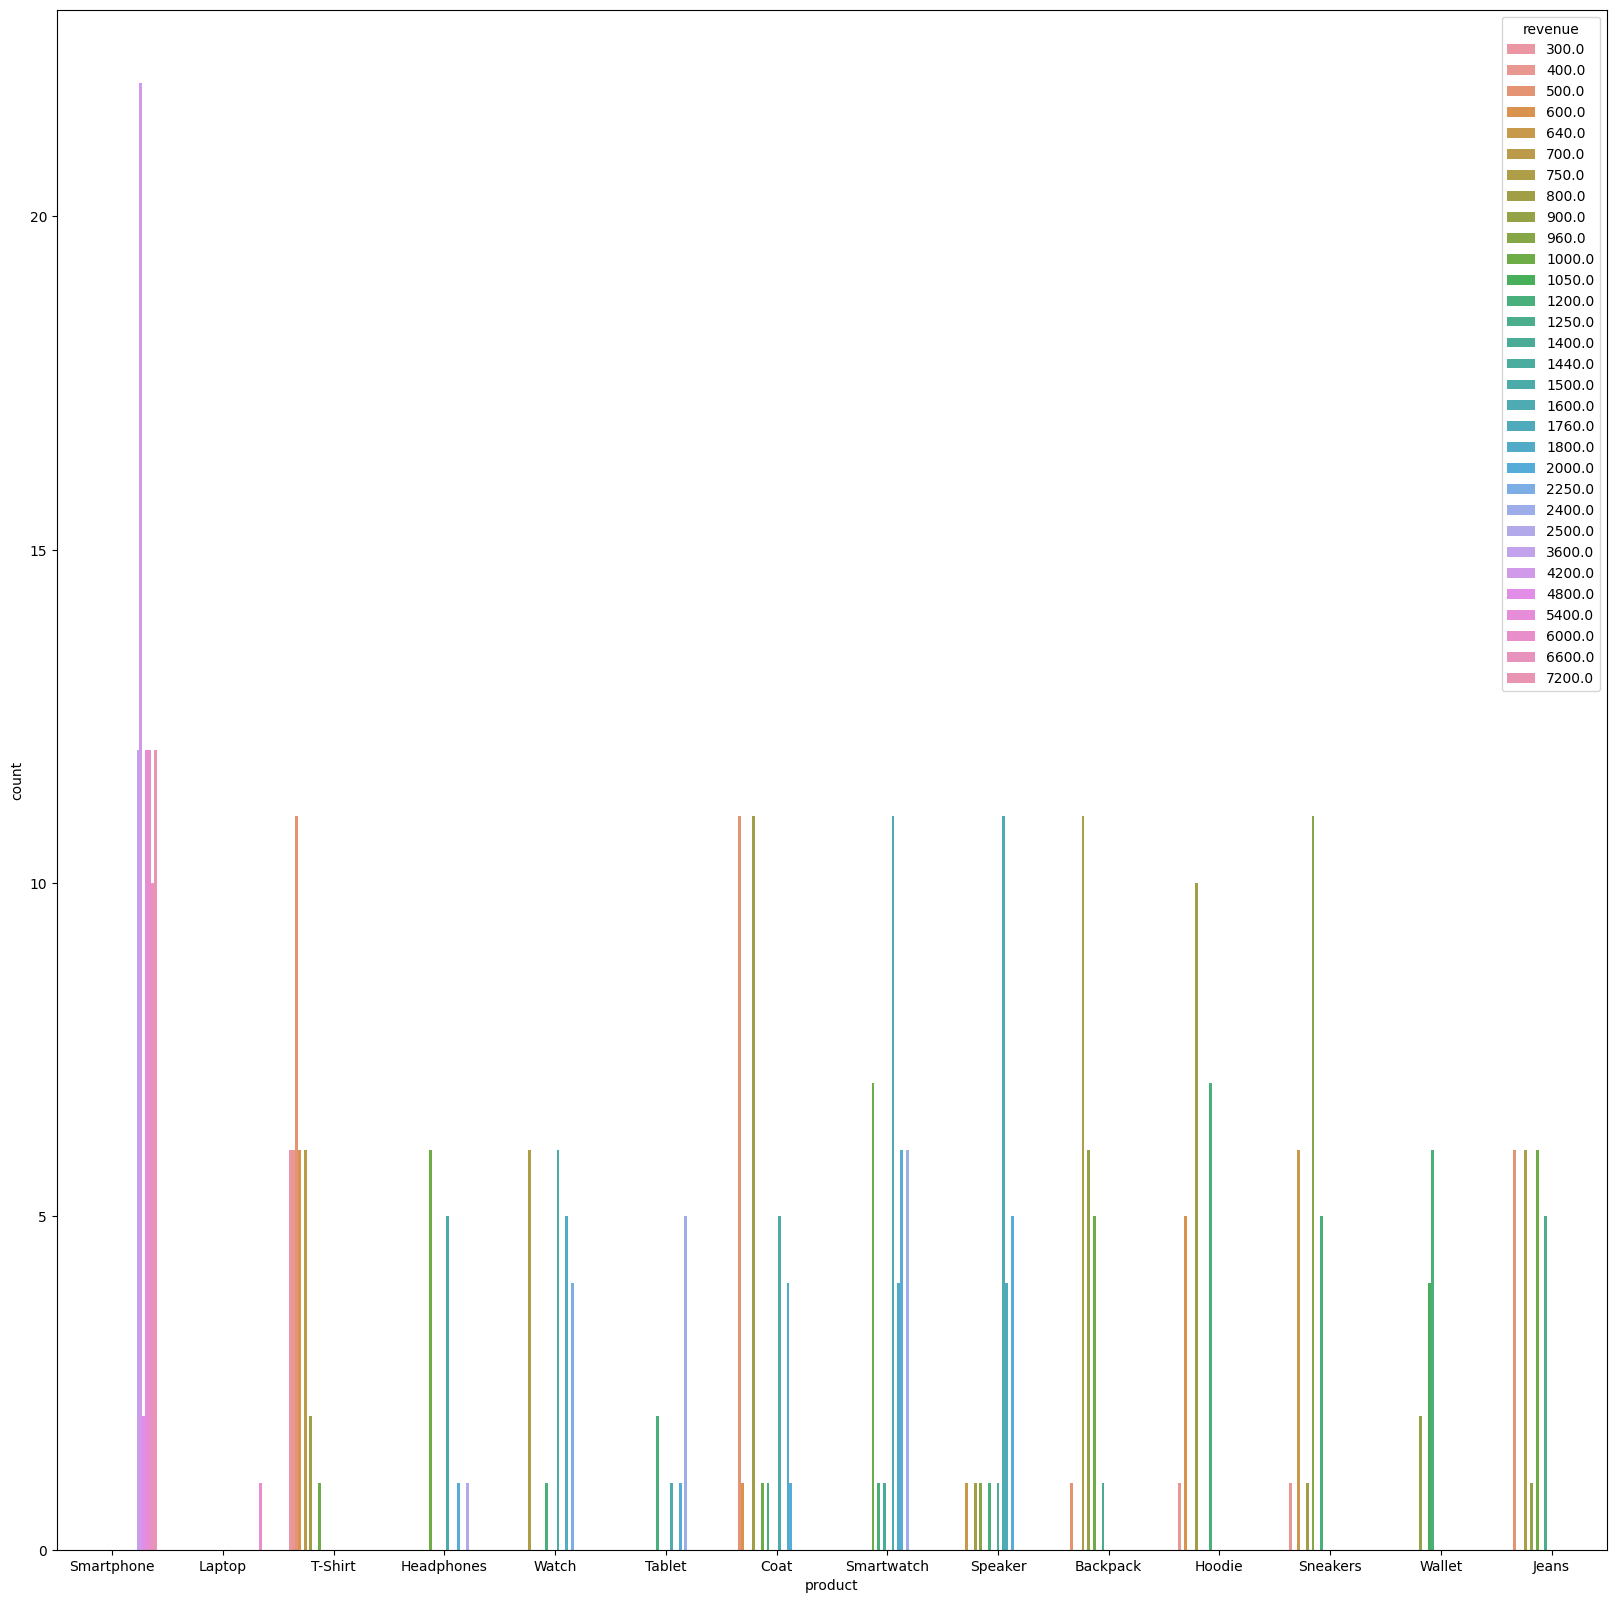

In [38]:
plt.figure(figsize=(20,20))
sns.countplot(data= df, x='product', hue='revenue')

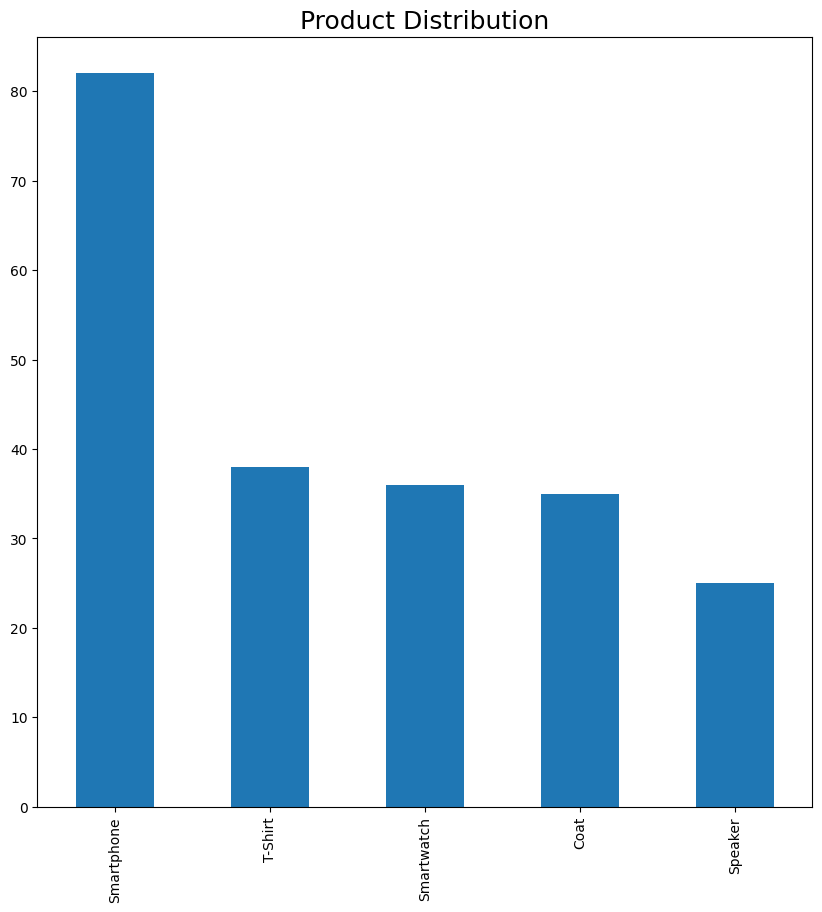

In [39]:
plt.figure(figsize=(10,10))
df['product'].value_counts().nlargest().plot(kind='bar')
plt.title("Product Distribution", fontsize=18);

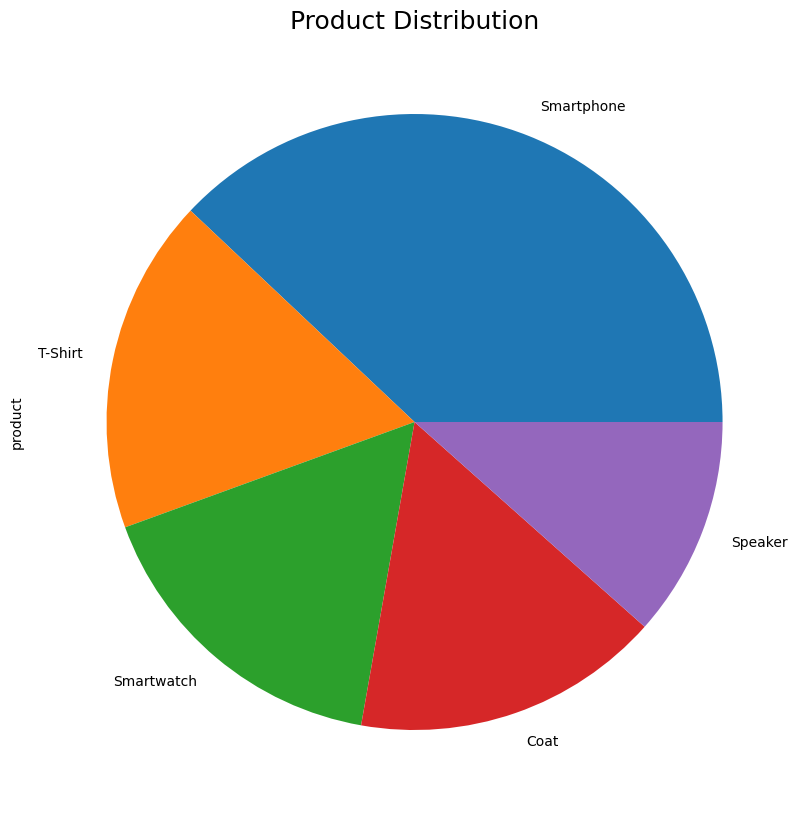

In [40]:
plt.figure(figsize=(10,10))
df['product'].value_counts().nlargest().plot(kind='pie')
plt.title("Product Distribution", fontsize=18);

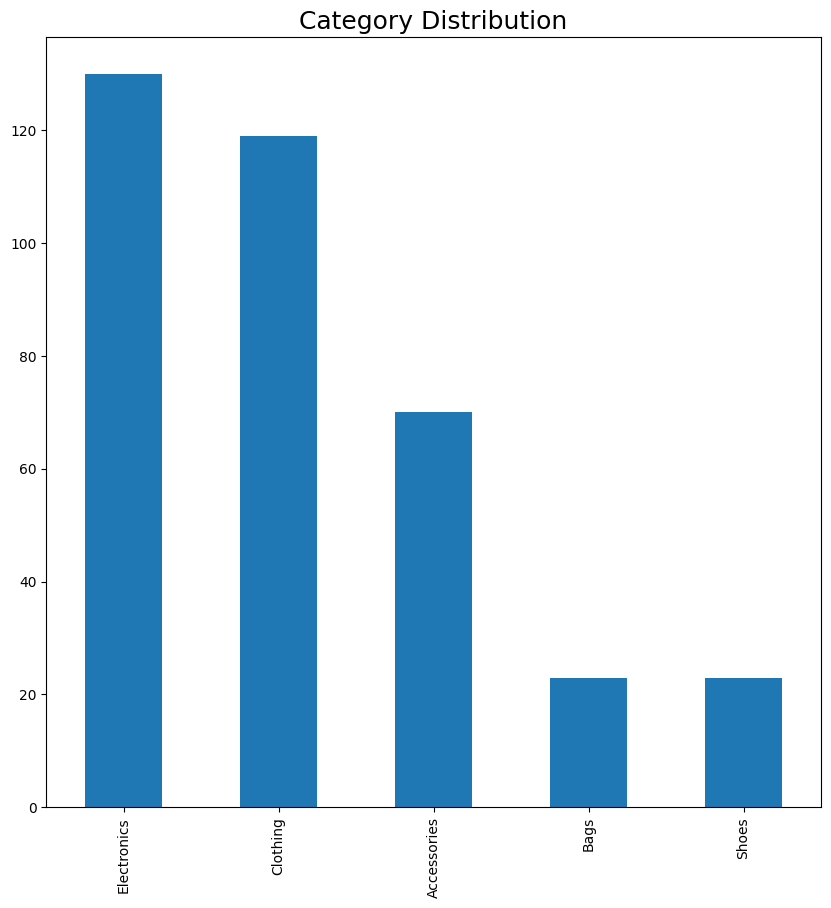

In [41]:
plt.figure(figsize=(10,10))
df['category'].value_counts().nlargest().plot(kind='bar')
plt.title("Category Distribution", fontsize=18);

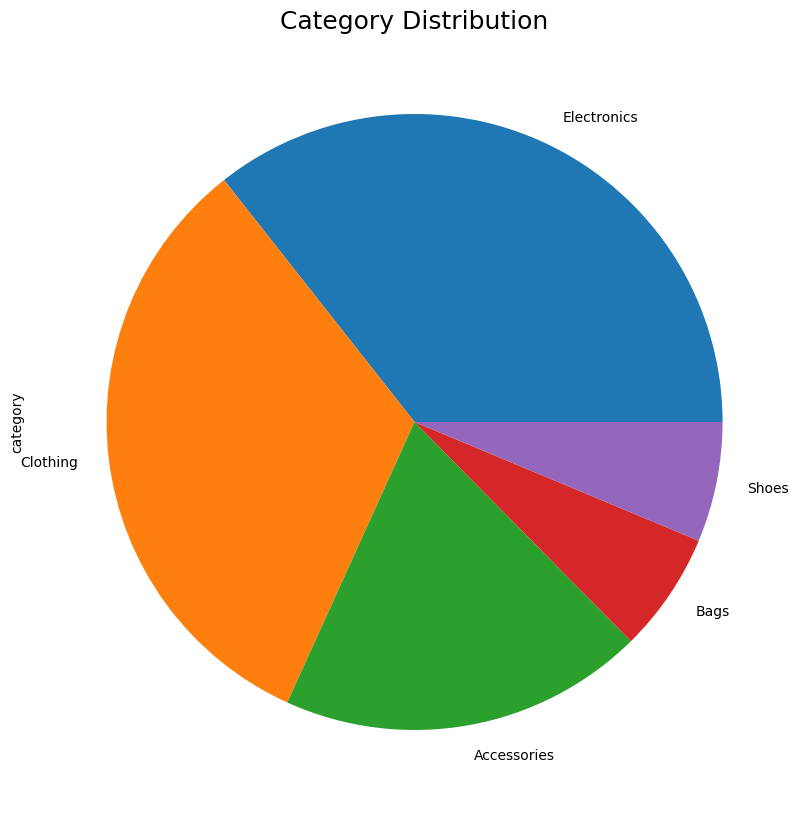

In [42]:
plt.figure(figsize=(10,10))
df['category'].value_counts().nlargest().plot(kind='pie')
plt.title("Category Distribution", fontsize=18);

<Axes: xlabel='product', ylabel='count'>

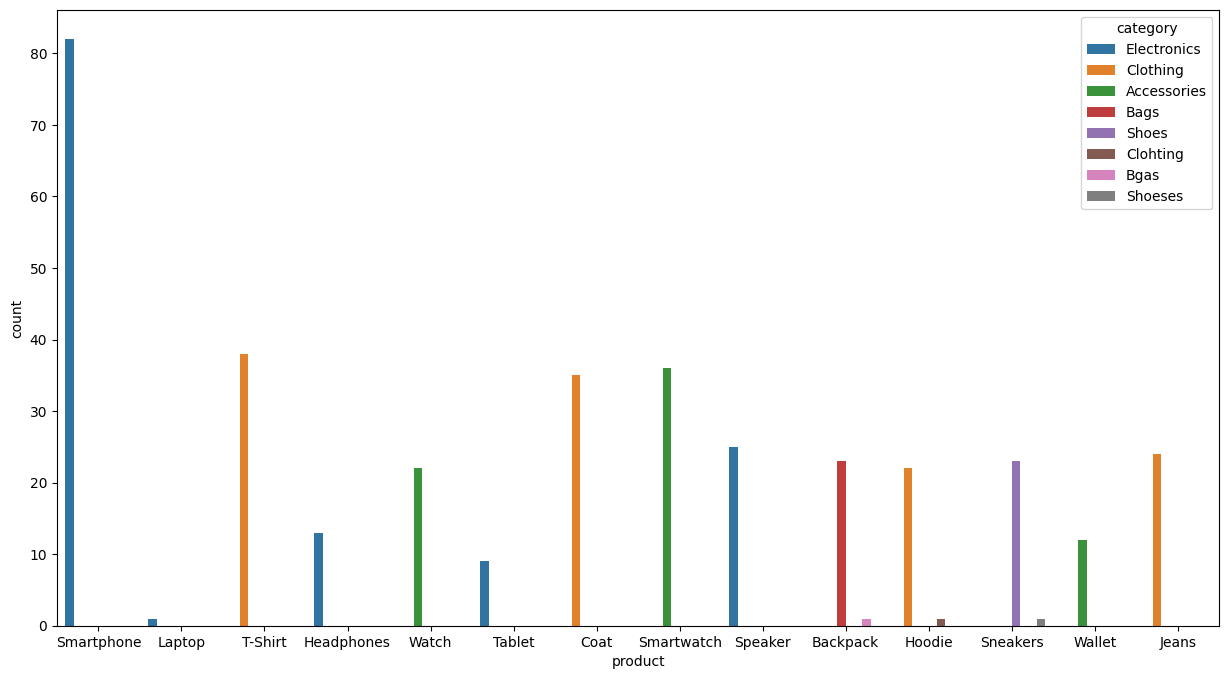

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(data= df, x='product', hue='category')

In [44]:
df1 = df[df['product']== 'Smartphone']
df1

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
6,2022-01-06,Smartphone,Electronics,600.0,8.0,4800.0
13,2022-01-12,Smartphone,Electronics,600.0,12.0,7200.0
18,2022-01-17,Smartphone,Electronics,600.0,6.0,3600.0
23,2022-01-22,Smartphone,Electronics,600.0,7.0,4200.0
...,...,...,...,...,...,...
348,2022-12-11,Smartphone,Electronics,600.0,12.0,7200.0
352,2022-12-15,Smartphone,Electronics,600.0,6.0,3600.0
358,2022-12-21,Smartphone,Electronics,600.0,7.0,4200.0
363,2022-12-26,Smartphone,Electronics,600.0,9.0,5400.0


In [45]:
df1.shape

(82, 6)

In [46]:
q1= df1["revenue"].sum()
q1

434400.0

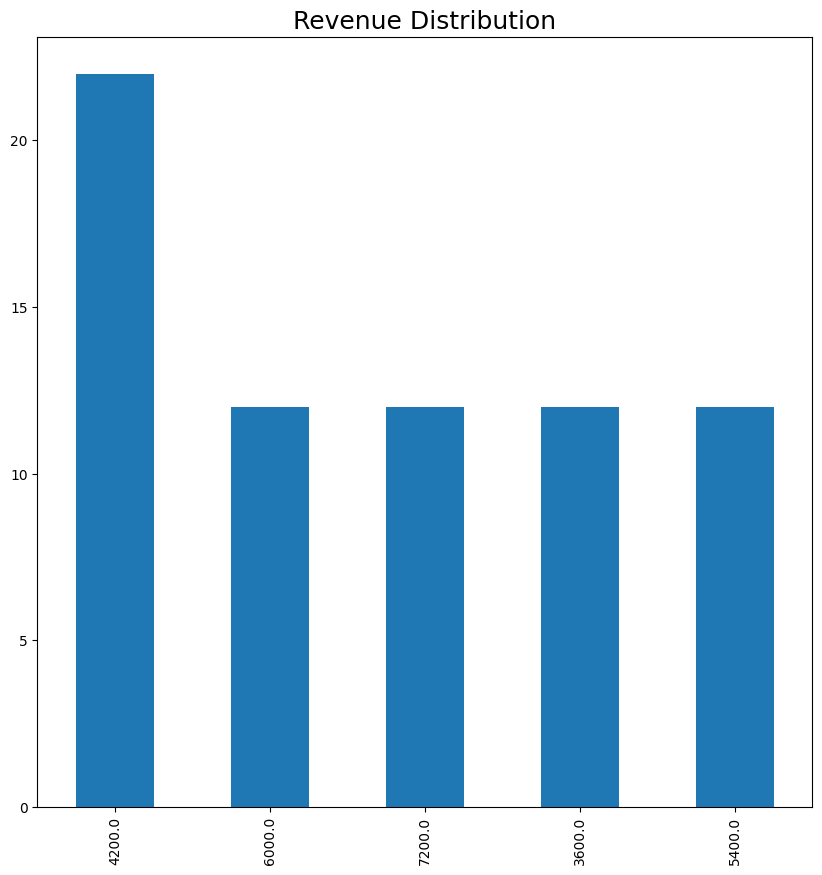

In [47]:
plt.figure(figsize=(10,10))
df1['revenue'].value_counts().nlargest().plot(kind='bar')
plt.title("Revenue Distribution", fontsize=18);

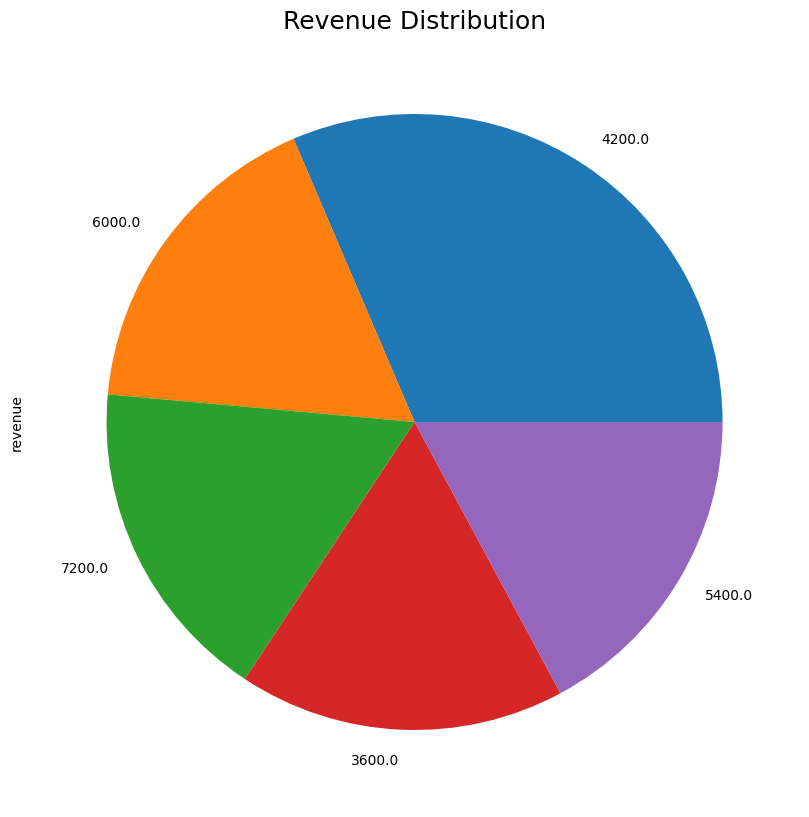

In [48]:
plt.figure(figsize=(10,10))
df1['revenue'].value_counts().nlargest().plot(kind='pie')
plt.title("Revenue Distribution", fontsize=18);

<Axes: xlabel='product', ylabel='count'>

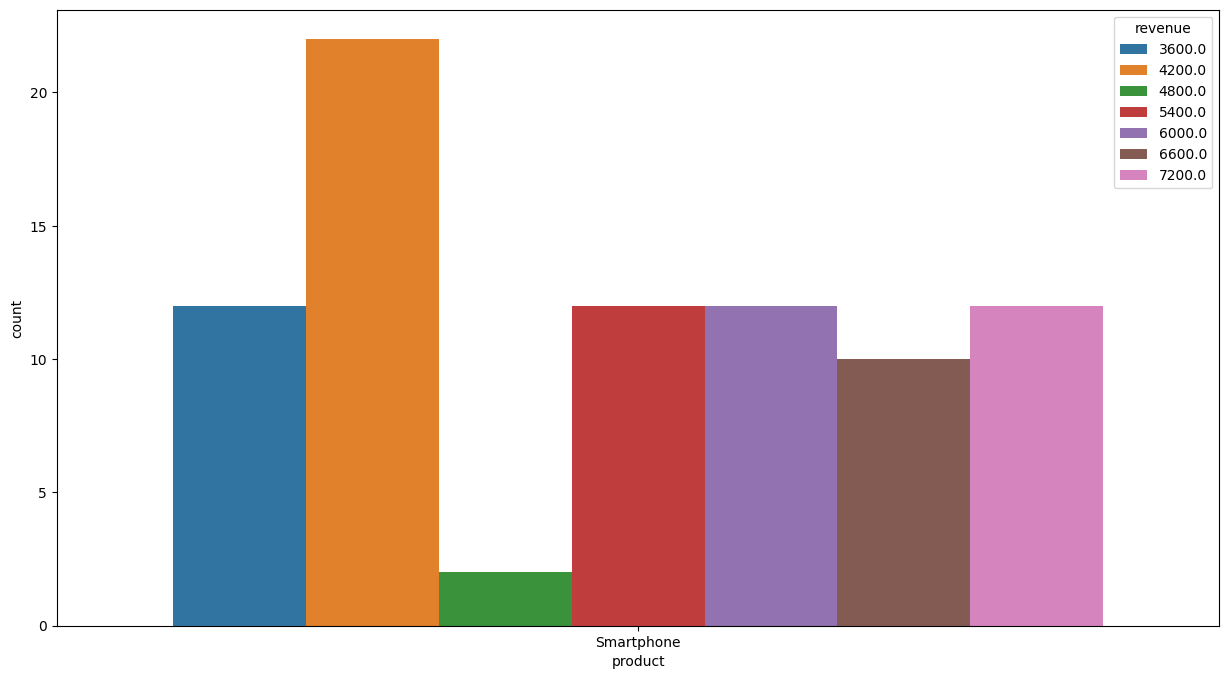

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(data= df1, x='product', hue='revenue')

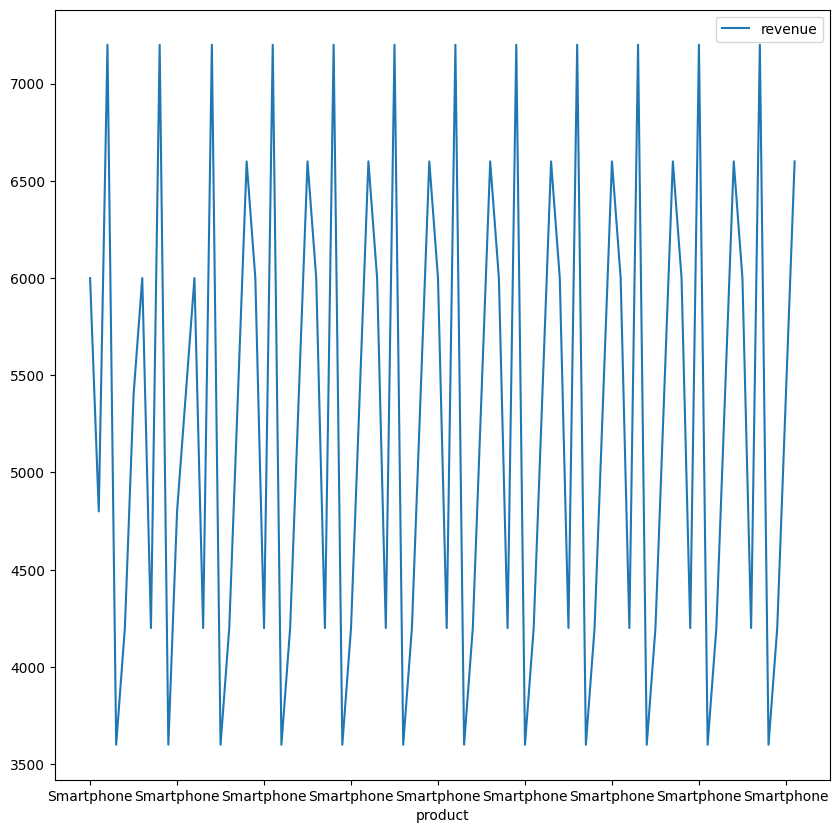

In [50]:
# plot multiple columns 
df1.plot(x="product", y=["revenue"],
        kind="line", figsize=(10, 10))
 
# display plot
plt.show()

## 3. What was the average price of a product sold by the company?

## 6- What was the average revenue per sale?

In [51]:
df['product'].unique()

array(['Smartphone', 'Laptop', 'T-Shirt', 'Headphones', 'Watch', 'Tablet',
       'Coat', 'Smartwatch', 'Speaker', 'Backpack', 'Hoodie', 'Sneakers',
       'Wallet', 'Jeans'], dtype=object)

<Axes: xlabel='product', ylabel='price'>

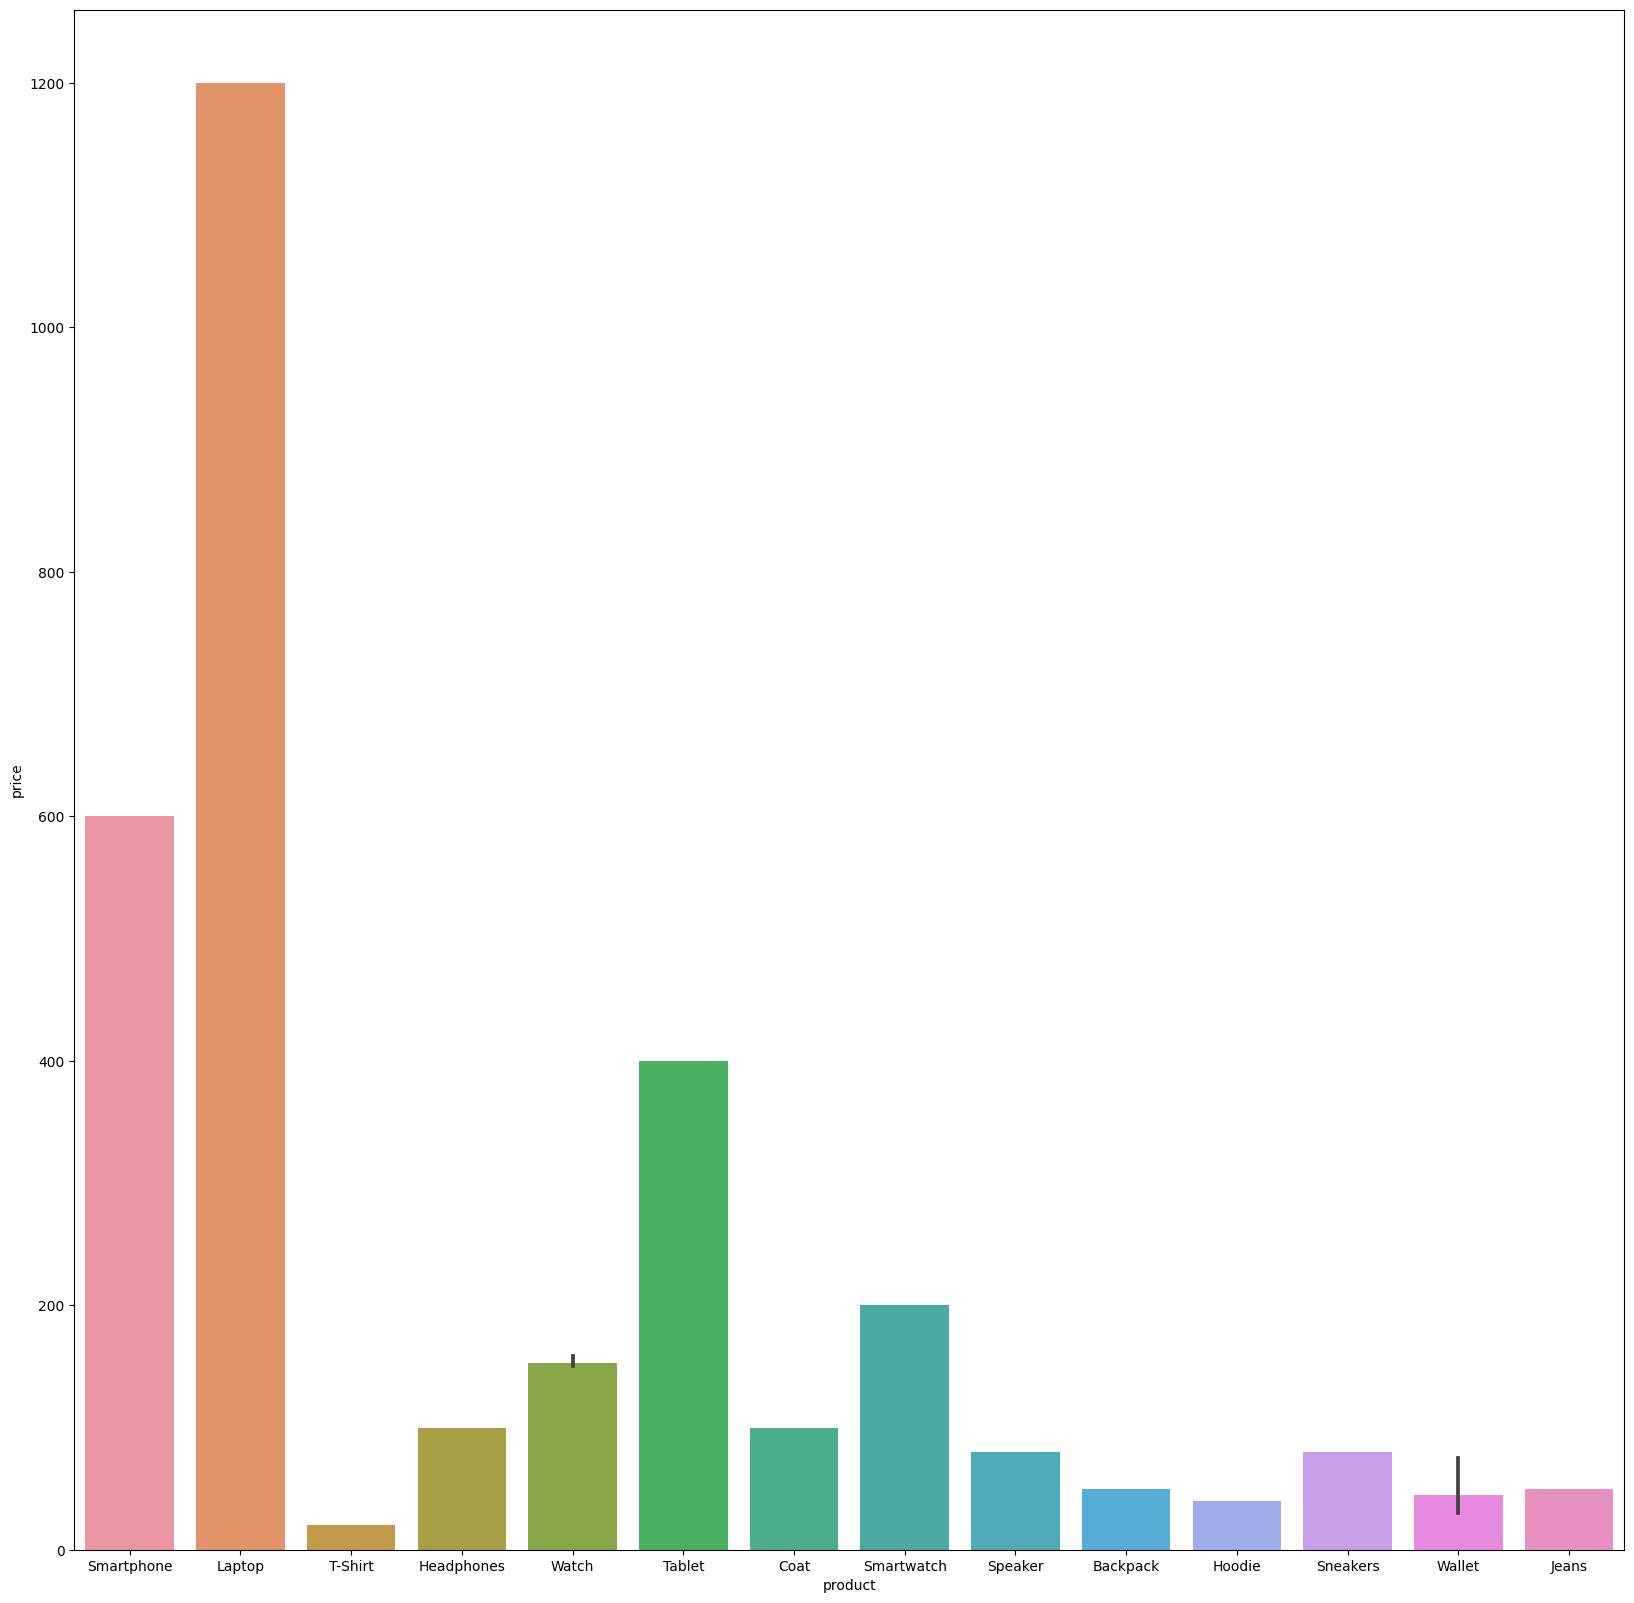

In [52]:
plt.figure(figsize=(20,20))

sns.barplot(x='product', y='price', data=df)

<Axes: xlabel='product', ylabel='count'>

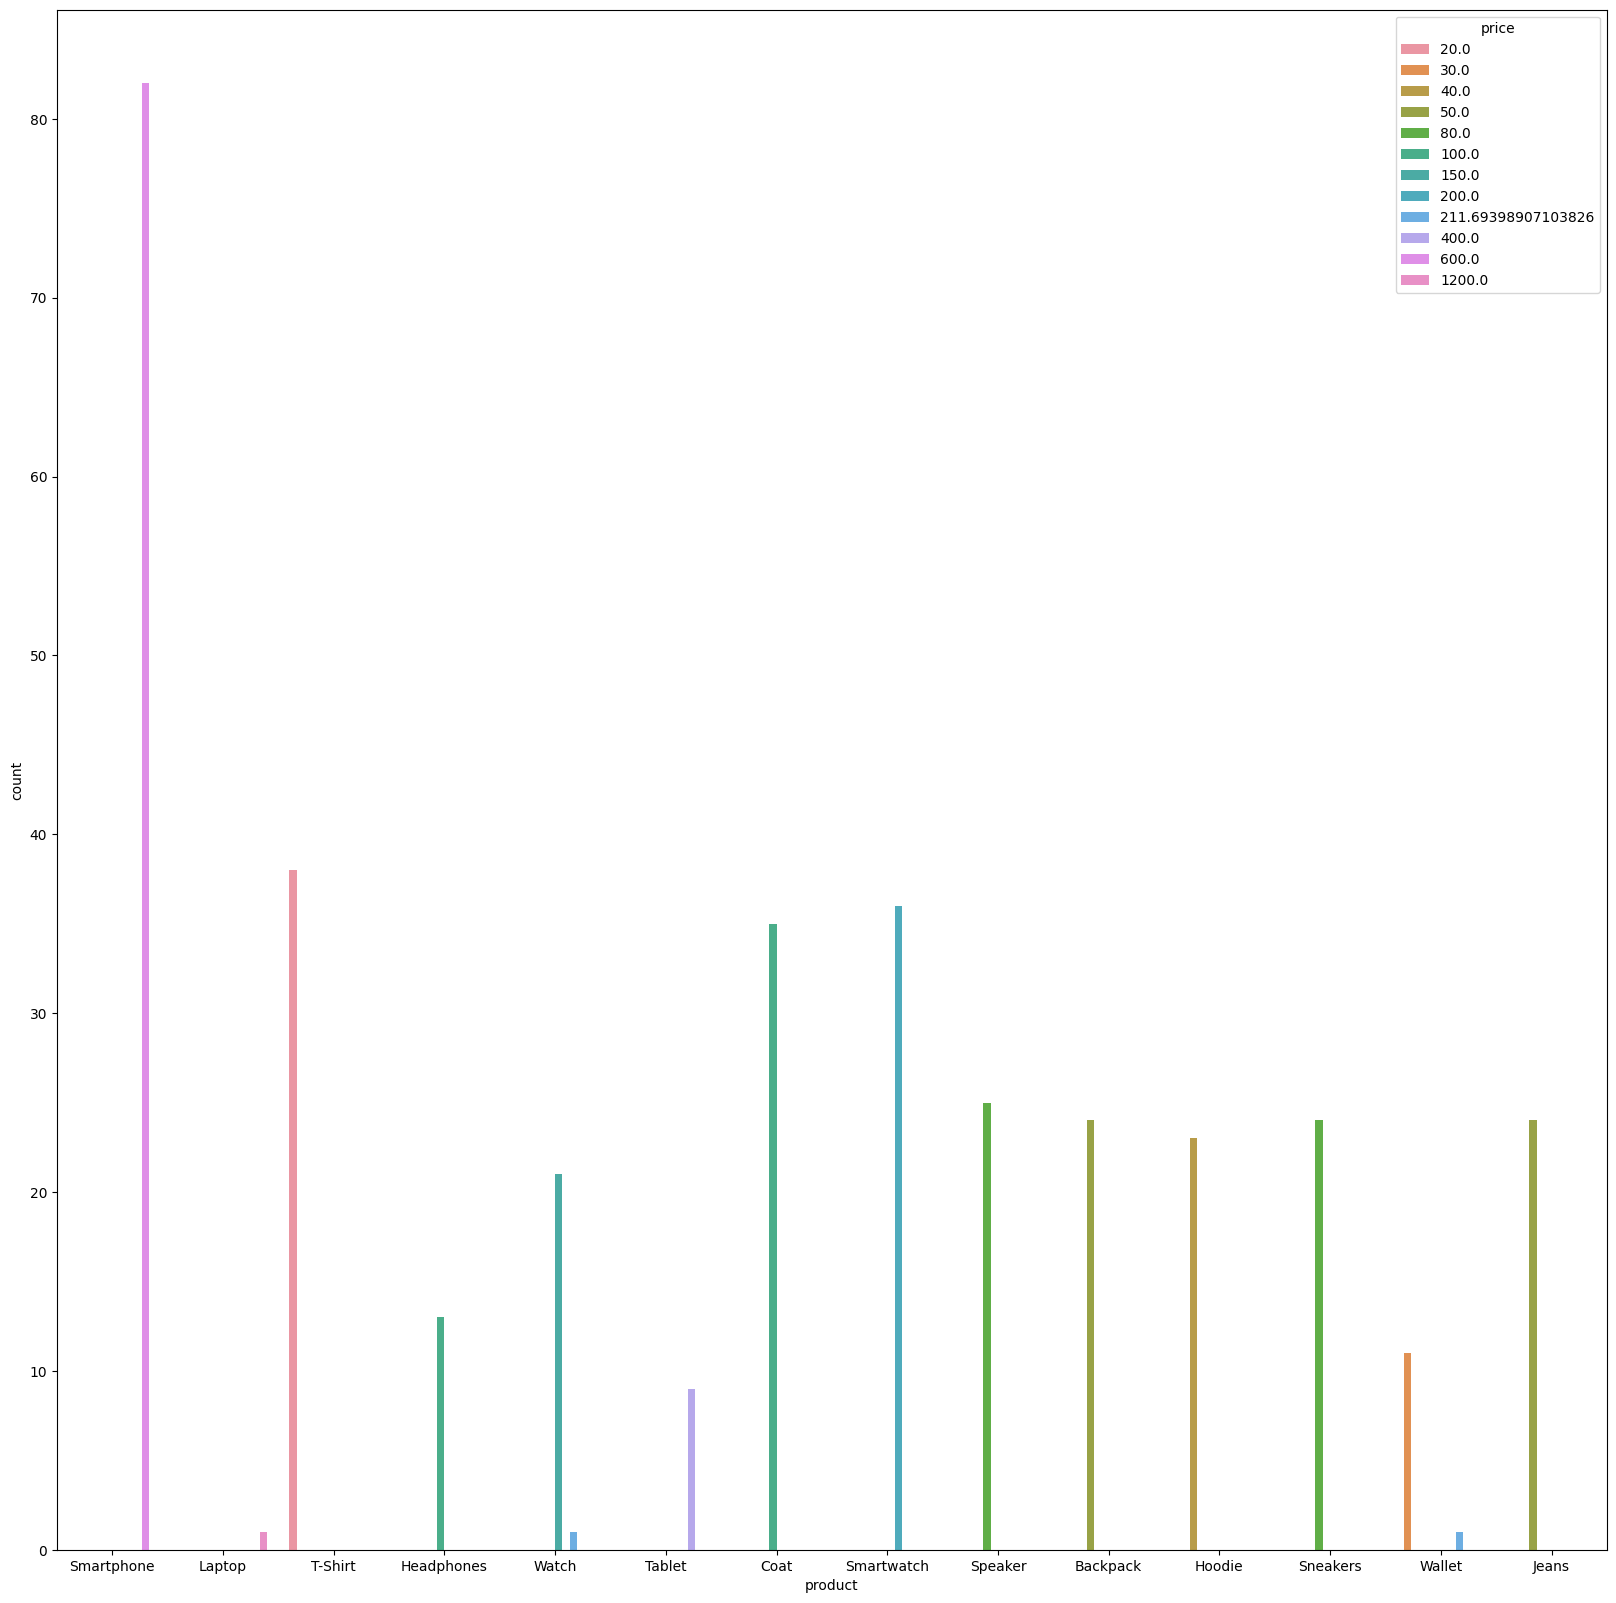

In [53]:
plt.figure(figsize=(20,20))
sns.countplot(data= df, x='product', hue='price')

### For Smartphone Product

In [54]:
Smartphone = df[df['product'] == 'Smartphone']
Smartphone

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
6,2022-01-06,Smartphone,Electronics,600.0,8.0,4800.0
13,2022-01-12,Smartphone,Electronics,600.0,12.0,7200.0
18,2022-01-17,Smartphone,Electronics,600.0,6.0,3600.0
23,2022-01-22,Smartphone,Electronics,600.0,7.0,4200.0
...,...,...,...,...,...,...
348,2022-12-11,Smartphone,Electronics,600.0,12.0,7200.0
352,2022-12-15,Smartphone,Electronics,600.0,6.0,3600.0
358,2022-12-21,Smartphone,Electronics,600.0,7.0,4200.0
363,2022-12-26,Smartphone,Electronics,600.0,9.0,5400.0


In [55]:
Smartphone['revenue'].max()

7200.0

In [56]:
Smartphone['revenue'].min()

3600.0

In [57]:
Smartphonemean = Smartphone.describe()
Smartphonemean

,price,quantity,revenue
count,82.0,82.000000,82.000000
mean,600.0,8.872234,5297.560976
std,0.0,2.174961,1257.174532
min,600.0,6.000000,3600.000000
25%,600.0,7.000000,4200.000000
50%,600.0,9.000000,5400.000000
75%,600.0,11.000000,6600.000000
max,600.0,14.523161,7200.000000


In [58]:
sp = Smartphone['revenue'].mean()
sp

5297.5609756097565

### For Laptop Product

In [59]:
Laptop = df[df['product'] == 'Laptop']
Laptop

,date,product,category,price,quantity,revenue
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0


In [60]:
Laptop['revenue'].max()

6000.0

In [61]:
Laptop['revenue'].min()

6000.0

In [62]:
Laptopmean = Laptop.describe()
Laptopmean

,price,quantity,revenue
count,1.0,1.0,1.0
mean,1200.0,5.0,6000.0
std,NaN,NaN,NaN
min,1200.0,5.0,6000.0
25%,1200.0,5.0,6000.0
50%,1200.0,5.0,6000.0
75%,1200.0,5.0,6000.0
max,1200.0,5.0,6000.0


In [63]:
lap = Laptop['revenue'].mean()
lap

6000.0

### For T-Shirt Product

In [64]:
T_Shirt = df[df['product'] == 'T-Shirt']
T_Shirt

,date,product,category,price,quantity,revenue
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
22,2022-01-21,T-Shirt,Clothing,20.0,40.0,800.0
30,2022-01-29,T-Shirt,Clothing,20.0,30.0,600.0
33,2022-02-01,T-Shirt,Clothing,20.0,35.0,700.0
43,2022-02-11,T-Shirt,Clothing,20.0,20.0,400.0
56,2022-02-24,T-Shirt,Clothing,20.0,15.0,300.0
61,2022-03-01,T-Shirt,Clothing,20.0,40.0,800.0
70,2022-03-10,T-Shirt,Clothing,20.0,30.0,600.0
80,2022-03-20,T-Shirt,Clothing,20.0,25.0,500.0


In [65]:
T_Shirt['revenue'].max()

1000.0

In [66]:
T_Shirt['revenue'].min()

300.0

In [67]:
T_Shirtmean = T_Shirt.describe()
T_Shirtmean

,price,quantity,revenue
count,38.0,38.000000,38.000000
mean,20.0,26.447368,528.947368
std,0.0,8.212375,164.247497
min,20.0,15.000000,300.000000
25%,20.0,20.000000,400.000000
50%,20.0,25.000000,500.000000
75%,20.0,30.000000,600.000000
max,20.0,50.000000,1000.000000


In [68]:
ts = T_Shirt['revenue'].mean()
ts

528.9473684210526

### For Headphones Product

In [69]:
Headphones = df[df['product'] == 'Headphones']
Headphones

,date,product,category,price,quantity,revenue
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
35,2022-02-03,Headphones,Electronics,100.0,25.0,2500.0
63,2022-03-03,Headphones,Electronics,100.0,15.0,1500.0
90,2022-03-30,Headphones,Electronics,100.0,10.0,1000.0
121,2022-04-30,Headphones,Electronics,100.0,15.0,1500.0
151,2022-05-30,Headphones,Electronics,100.0,10.0,1000.0
182,2022-06-30,Headphones,Electronics,100.0,15.0,1500.0
212,2022-07-30,Headphones,Electronics,100.0,10.0,1000.0
243,2022-08-30,Headphones,Electronics,100.0,15.0,1500.0
273,2022-09-29,Headphones,Electronics,100.0,10.0,1000.0


In [70]:
Headphones['revenue'].max()

2500.0

In [71]:
Headphones['revenue'].min()

1000.0

In [72]:
Headphonesmean = Headphones.describe()
Headphonesmean

,price,quantity,revenue
count,13.0,13.000000,13.000000
mean,100.0,13.846154,1384.615385
std,0.0,4.634043,463.404348
min,100.0,10.000000,1000.000000
25%,100.0,10.000000,1000.000000
50%,100.0,15.000000,1500.000000
75%,100.0,15.000000,1500.000000
max,100.0,25.000000,2500.000000


In [73]:
hp = Headphones['revenue'].mean()
hp

1384.6153846153845

### For Watch Product

In [74]:
Watch = df[df['product'] == 'Watch']
Watch

,date,product,category,price,quantity,revenue
5,2022-01-05,Watch,Accessories,150.000000,10.0,1500.0
37,2022-02-05,Watch,Accessories,150.000000,8.0,1200.0
60,2022-02-28,Watch,Accessories,150.000000,5.0,750.0
88,2022-03-28,Watch,Accessories,150.000000,10.0,1500.0
101,2022-04-10,Watch,Accessories,150.000000,12.0,1800.0
119,2022-04-28,Watch,Accessories,150.000000,10.0,1500.0
132,2022-05-11,Watch,Accessories,150.000000,15.0,2250.0
149,2022-05-28,Watch,Accessories,150.000000,5.0,750.0
162,2022-06-10,Watch,Accessories,150.000000,12.0,1800.0
180,2022-06-28,Watch,Accessories,150.000000,10.0,1500.0


In [75]:
Watch['revenue'].max()

2250.0

In [76]:
Watch['revenue'].min()

750.0

In [77]:
Watchmean = Watch.describe()
Watchmean

,price,quantity,revenue
count,22.000000,22.000000,22.000000
mean,152.804272,9.909091,1486.363636
std,13.153203,3.610950,541.642524
min,150.000000,5.000000,750.000000
25%,150.000000,5.750000,862.500000
50%,150.000000,10.000000,1500.000000
75%,150.000000,12.000000,1800.000000
max,211.693989,15.000000,2250.000000


In [78]:
w = Watch['revenue'].mean()
w

1486.3636363636363

### For Tablet Product

In [79]:
Tablet = df[df['product'] == 'Tablet']
Tablet

,date,product,category,price,quantity,revenue
7,2022-01-06,Tablet,Electronics,400.0,5.0,2000.0
24,2022-01-23,Tablet,Electronics,400.0,3.0,1200.0
47,2022-02-15,Tablet,Electronics,400.0,4.0,1600.0
81,2022-03-21,Tablet,Electronics,400.0,3.0,1200.0
112,2022-04-21,Tablet,Electronics,400.0,6.0,2400.0
173,2022-06-21,Tablet,Electronics,400.0,6.0,2400.0
234,2022-08-21,Tablet,Electronics,400.0,6.0,2400.0
296,2022-10-21,Tablet,Electronics,400.0,6.0,2400.0
357,2022-12-20,Tablet,Electronics,400.0,6.0,2400.0


In [80]:
Tablet['revenue'].max()

2400.0

In [81]:
Tablet['revenue'].min()

1200.0

In [82]:
Tabletmean = Tablet.describe()
Tabletmean

,price,quantity,revenue
count,9.0,9.000000,9.000000
mean,400.0,5.000000,2000.000000
std,0.0,1.322876,529.150262
min,400.0,3.000000,1200.000000
25%,400.0,4.000000,1600.000000
50%,400.0,6.000000,2400.000000
75%,400.0,6.000000,2400.000000
max,400.0,6.000000,2400.000000


In [83]:
t = Tablet['revenue'].mean()
t

2000.0

### For Coat Product

In [84]:
Coat = df[df['product'] == 'Coat']
Coat

,date,product,category,price,quantity,revenue
8,2022-01-07,Coat,Clothing,100.0,10.0,1000.0
19,2022-01-18,Coat,Clothing,100.0,8.0,800.0
28,2022-01-27,Coat,Clothing,100.0,5.0,500.0
36,2022-02-04,Coat,Clothing,100.0,12.0,1200.0
55,2022-02-23,Coat,Clothing,100.0,6.0,600.0
64,2022-03-04,Coat,Clothing,100.0,20.0,2000.0
77,2022-03-17,Coat,Clothing,100.0,8.0,800.0
89,2022-03-29,Coat,Clothing,100.0,5.0,500.0
95,2022-04-04,Coat,Clothing,100.0,15.0,1500.0
108,2022-04-17,Coat,Clothing,100.0,8.0,800.0


In [85]:
Coat['revenue'].max()

2000.0

In [86]:
Coat['revenue'].min()

500.0

In [87]:
Coatmean = Coat.describe()
Coatmean

,price,quantity,revenue
count,35.0,35.000000,35.000000
mean,100.0,9.657143,965.714286
std,0.0,4.898636,489.863641
min,100.0,5.000000,500.000000
25%,100.0,5.000000,500.000000
50%,100.0,8.000000,800.000000
75%,100.0,15.000000,1500.000000
max,100.0,20.000000,2000.000000


In [88]:
c = Coat['revenue'].mean()
c

965.7142857142857

### For Smartwatch Product

In [89]:
Smartwatch = df[df['product'] == 'Smartwatch']
Smartwatch

,date,product,category,price,quantity,revenue
9,2022-01-08,Smartwatch,Accessories,200.0,12.0,2400.0
17,2022-01-16,Smartwatch,Accessories,200.0,5.0,1000.0
26,2022-01-25,Smartwatch,Accessories,200.0,8.0,1600.0
41,2022-02-09,Smartwatch,Accessories,200.0,6.0,1200.0
48,2022-02-16,Smartwatch,Accessories,200.0,7.0,1400.0
57,2022-02-25,Smartwatch,Accessories,200.0,10.0,2000.0
65,2022-03-05,Smartwatch,Accessories,200.0,12.0,2400.0
75,2022-03-15,Smartwatch,Accessories,200.0,5.0,1000.0
85,2022-03-25,Smartwatch,Accessories,200.0,8.0,1600.0
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,2000.0


In [90]:
Smartwatch['revenue'].max()

2400.0

In [91]:
Smartwatch['revenue'].min()

1000.0

In [92]:
Smartwatchmean = Smartwatch.describe()
Smartwatchmean

,price,quantity,revenue
count,36.0,36.000000,36.000000
mean,200.0,8.444444,1688.888889
std,0.0,2.298378,459.675524
min,200.0,5.000000,1000.000000
25%,200.0,7.750000,1550.000000
50%,200.0,8.000000,1600.000000
75%,200.0,10.000000,2000.000000
max,200.0,12.000000,2400.000000


In [93]:
sw = Smartwatch['revenue'].mean()
sw

1688.888888888889

### For Speaker Product

In [94]:
Speaker = df[df['product'] == 'Speaker']
Speaker

,date,product,category,price,quantity,revenue
10,2022-01-09,Speaker,Electronics,80.0,15.0,1200.0
20,2022-01-19,Speaker,Electronics,80.0,20.0,1600.0
29,2022-01-28,Speaker,Electronics,80.0,8.0,640.0
39,2022-02-07,Speaker,Electronics,80.0,18.0,1440.0
51,2022-02-19,Speaker,Electronics,80.0,12.0,960.0
67,2022-03-07,Speaker,Electronics,80.0,10.0,800.0
78,2022-03-18,Speaker,Electronics,80.0,20.0,1600.0
94,2022-04-03,Speaker,Electronics,80.0,25.0,2000.0
109,2022-04-18,Speaker,Electronics,80.0,20.0,1600.0
125,2022-05-04,Speaker,Electronics,80.0,22.0,1760.0


In [95]:
Speaker['revenue'].max()

2000.0

In [96]:
Speaker['revenue'].min()

640.0

In [97]:
Speakermean = Speaker.describe()
Speakermean

,price,quantity,revenue
count,25.0,25.000000,25.00000
mean,80.0,19.840000,1587.20000
std,0.0,4.459821,356.78565
min,80.0,8.000000,640.00000
25%,80.0,20.000000,1600.00000
50%,80.0,20.000000,1600.00000
75%,80.0,22.000000,1760.00000
max,80.0,25.000000,2000.00000


In [98]:
s = Speaker['revenue'].mean()
s

1587.2

### For Backpack Product

In [99]:
Backpack = df[df['product'] == 'Backpack']
Backpack

,date,product,category,price,quantity,revenue
11,2022-01-10,Backpack,Bags,50.0,20.0,1000.0
21,2022-01-20,Backpack,Bags,50.0,15.0,750.0
40,2022-02-08,Backpack,Bags,50.0,25.0,1250.0
52,2022-02-20,Backpack,Bags,50.0,18.0,900.0
68,2022-03-08,Backpack,Bags,50.0,15.0,750.0
79,2022-03-19,Backpack,Bags,50.0,10.0,500.0
98,2022-04-07,Backpack,Bags,50.0,18.0,900.0
110,2022-04-19,Backpack,Bags,50.0,15.0,750.0
129,2022-05-08,Backpack,Bags,50.0,20.0,1000.0
141,2022-05-20,Backpack,Bags,50.0,15.0,750.0


In [100]:
Backpack['revenue'].max()

1250.0

In [101]:
Backpack['revenue'].min()

500.0

In [102]:
Backpackmean = Backpack.describe()
Backpackmean

,price,quantity,revenue
count,24.0,24.000000,24.000000
mean,50.0,17.000000,850.000000
std,0.0,3.007238,150.361882
min,50.0,10.000000,500.000000
25%,50.0,15.000000,750.000000
50%,50.0,16.500000,825.000000
75%,50.0,18.500000,925.000000
max,50.0,25.000000,1250.000000


In [103]:
bp = Backpack['revenue'].mean()
bp

850.0

### For Hoodie Product

In [104]:
Hoodie = df[df['product'] == 'Hoodie']
Hoodie

,date,product,category,price,quantity,revenue
12,2022-01-11,Hoodie,Clothing,40.0,30.0,1200.0
25,2022-01-24,Hoodie,Clothing,40.0,15.0,600.0
50,2022-02-18,Hoodie,Clothing,40.0,20.0,800.0
71,2022-03-11,Hoodie,Clothing,40.0,10.0,400.0
92,2022-04-01,Hoodie,Clothing,40.0,30.0,1200.0
102,2022-04-11,Hoodie,Clothing,40.0,20.0,800.0
123,2022-05-02,Hoodie,Clothing,40.0,20.0,800.0
133,2022-05-12,Hoodie,Clothing,40.0,15.0,600.0
153,2022-06-01,Hoodie,Clothing,40.0,30.0,1200.0
163,2022-06-11,Hoodie,Clothing,40.0,20.0,800.0


In [105]:
Hoodie['revenue'].max()

1200.0

In [106]:
Hoodie['revenue'].min()

400.0

In [107]:
Hoodiemean = Hoodie.describe()
Hoodiemean

,price,quantity,revenue
count,23.0,23.000000,23.000000
mean,40.0,21.521739,860.869565
std,0.0,6.294800,251.791996
min,40.0,10.000000,400.000000
25%,40.0,17.500000,700.000000
50%,40.0,20.000000,800.000000
75%,40.0,30.000000,1200.000000
max,40.0,30.000000,1200.000000


In [108]:
h = Hoodie['revenue'].mean()
h

860.8695652173913

### For Sneakers Product

In [109]:
Sneakers = df[df['product'] == 'Sneakers']
Sneakers

,date,product,category,price,quantity,revenue
14,2022-01-13,Sneakers,Shoes,80.0,10.0,800.0
27,2022-01-26,Sneakers,Shoes,80.0,12.0,960.0
45,2022-02-13,Sneakers,Shoes,80.0,8.0,640.0
53,2022-02-21,Sneakers,Shoes,80.0,5.0,400.0
73,2022-03-13,Sneakers,Shoes,80.0,15.0,1200.0
83,2022-03-23,Sneakers,Shoes,80.0,12.0,960.0
104,2022-04-13,Sneakers,Shoes,80.0,8.0,640.0
114,2022-04-23,Sneakers,Shoes,80.0,12.0,960.0
135,2022-05-14,Sneakers,Shoes,80.0,8.0,640.0
144,2022-05-23,Sneakers,Shoes,80.0,12.0,960.0


In [110]:
Sneakers['revenue'].max()

1200.0

In [111]:
Sneakers['revenue'].min()

400.0

In [112]:
Sneakersmean = Sneakers.describe()
Sneakersmean

,price,quantity,revenue
count,24.0,24.000000,24.000000
mean,80.0,11.250000,900.000000
std,0.0,2.801397,224.111773
min,80.0,5.000000,400.000000
25%,80.0,8.000000,640.000000
50%,80.0,12.000000,960.000000
75%,80.0,12.000000,960.000000
max,80.0,15.000000,1200.000000


In [113]:
sn = Sneakers['revenue'].mean()
sn

900.0

### For Wallet Product

In [114]:
Wallet = df[df['product'] == 'Wallet']
Wallet

,date,product,category,price,quantity,revenue
15,2022-01-14,Wallet,Accessories,30.000000,40.0,1200.0
46,2022-02-14,Wallet,Accessories,30.000000,30.0,900.0
74,2022-03-14,Wallet,Accessories,30.000000,40.0,1200.0
105,2022-04-14,Wallet,Accessories,30.000000,30.0,900.0
136,2022-05-15,Wallet,Accessories,30.000000,35.0,1050.0
166,2022-06-14,Wallet,Accessories,30.000000,40.0,1200.0
197,2022-07-15,Wallet,Accessories,30.000000,35.0,1050.0
227,2022-08-14,Wallet,Accessories,30.000000,40.0,1200.0
258,2022-09-14,Wallet,Accessories,30.000000,35.0,1050.0
289,2022-10-14,Wallet,Accessories,30.000000,40.0,1200.0


In [115]:
Wallet['revenue'].max()

1200.0

In [116]:
Wallet['revenue'].min()

900.0

In [117]:
Walletmean = Wallet.describe()
Walletmean

,price,quantity,revenue
count,12.000000,12.000000,12.000000
mean,45.141166,36.666667,1100.000000
std,52.450537,3.892495,116.774842
min,30.000000,30.000000,900.000000
25%,30.000000,35.000000,1050.000000
50%,30.000000,37.500000,1125.000000
75%,30.000000,40.000000,1200.000000
max,211.693989,40.000000,1200.000000


In [118]:
wl = Wallet['revenue'].mean()
wl

1100.0

### For Jeans Product

In [119]:
Jeans = df[df['product'] == 'Jeans']
Jeans

,date,product,category,price,quantity,revenue
16,2022-01-15,Jeans,Clothing,50.0,20.0,1000.0
32,2022-01-31,Jeans,Clothing,50.0,15.0,750.0
42,2022-02-10,Jeans,Clothing,50.0,10.0,500.0
58,2022-02-26,Jeans,Clothing,50.0,18.0,900.0
69,2022-03-09,Jeans,Clothing,50.0,25.0,1250.0
86,2022-03-26,Jeans,Clothing,50.0,20.0,1000.0
100,2022-04-09,Jeans,Clothing,50.0,10.0,500.0
117,2022-04-26,Jeans,Clothing,50.0,15.0,750.0
131,2022-05-10,Jeans,Clothing,50.0,25.0,1250.0
147,2022-05-26,Jeans,Clothing,50.0,20.0,1000.0


In [120]:
Jeans['revenue'].max()

1250.0

In [121]:
Jeans['revenue'].min()

500.0

In [122]:
Jeansmean = Jeans.describe()
Jeansmean

,price,quantity,revenue
count,24.0,24.000000,24.000000
mean,50.0,17.208333,860.416667
std,0.0,5.484993,274.249635
min,50.0,10.000000,500.000000
25%,50.0,13.750000,687.500000
50%,50.0,16.500000,825.000000
75%,50.0,20.000000,1000.000000
max,50.0,25.000000,1250.000000


In [123]:
j = Jeans['revenue'].mean()
j

860.4166666666666

## 4- What was the total quantity of products sold by the company?

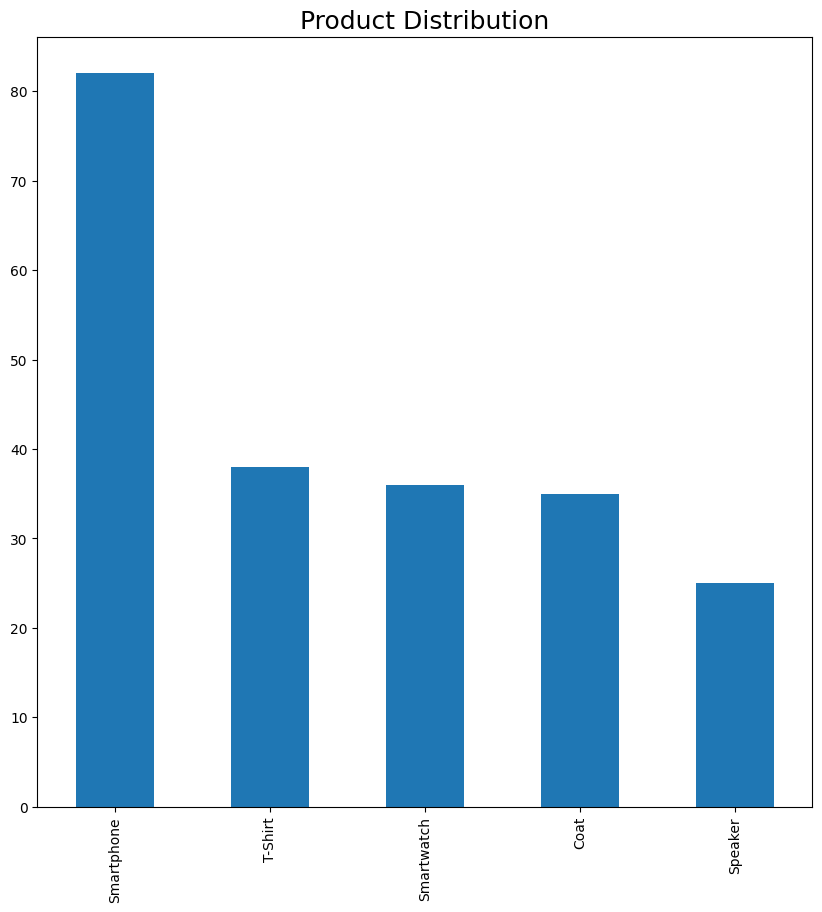

In [124]:
plt.figure(figsize=(10,10))
df['product'].value_counts().nlargest().plot(kind='bar')
plt.title("Product Distribution", fontsize=18);

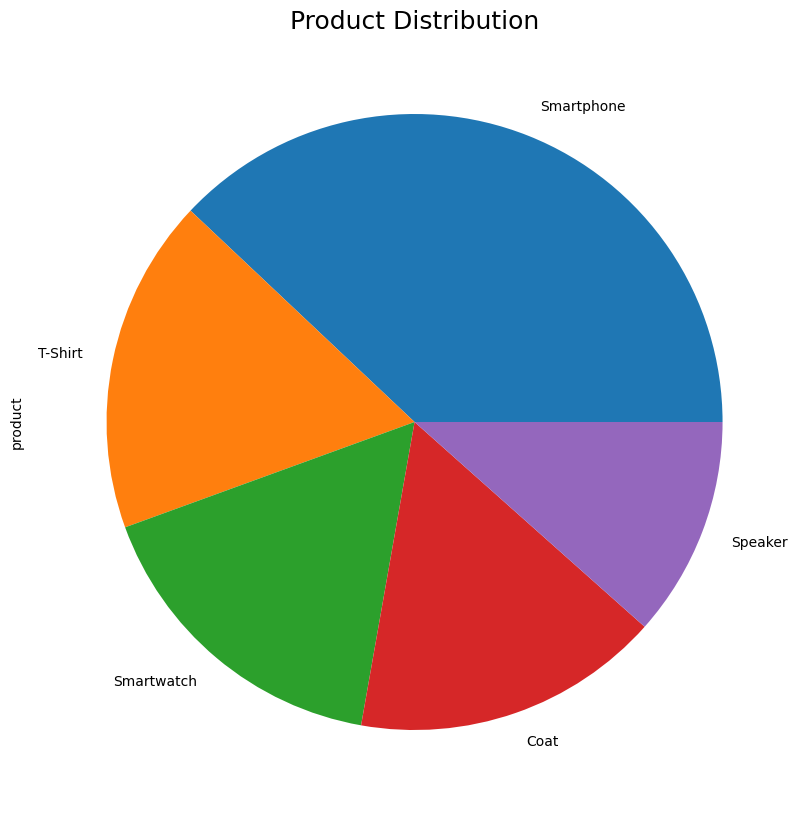

In [125]:
plt.figure(figsize=(10,10))
df['product'].value_counts().nlargest().plot(kind='pie')
plt.title("Product Distribution", fontsize=18);

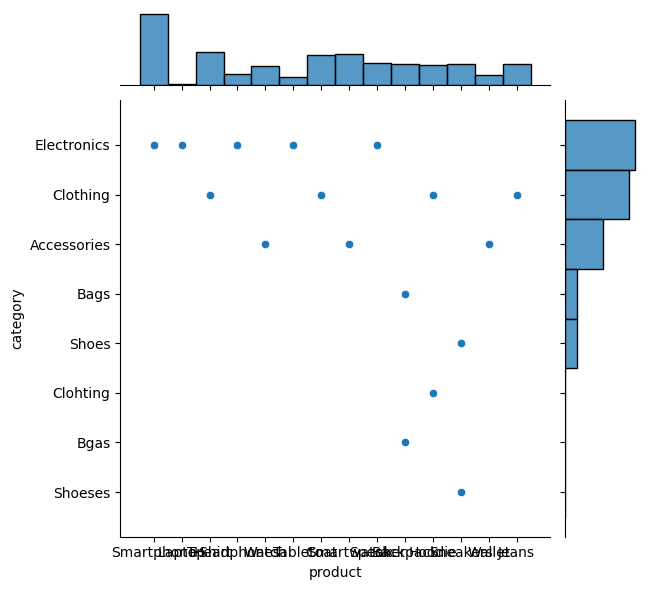

In [126]:
sns.jointplot(x='product',y='category',data=df)

## 5- Which category had the highest revenue? How much revenue did it generate?

<Axes: xlabel='category', ylabel='revenue'>

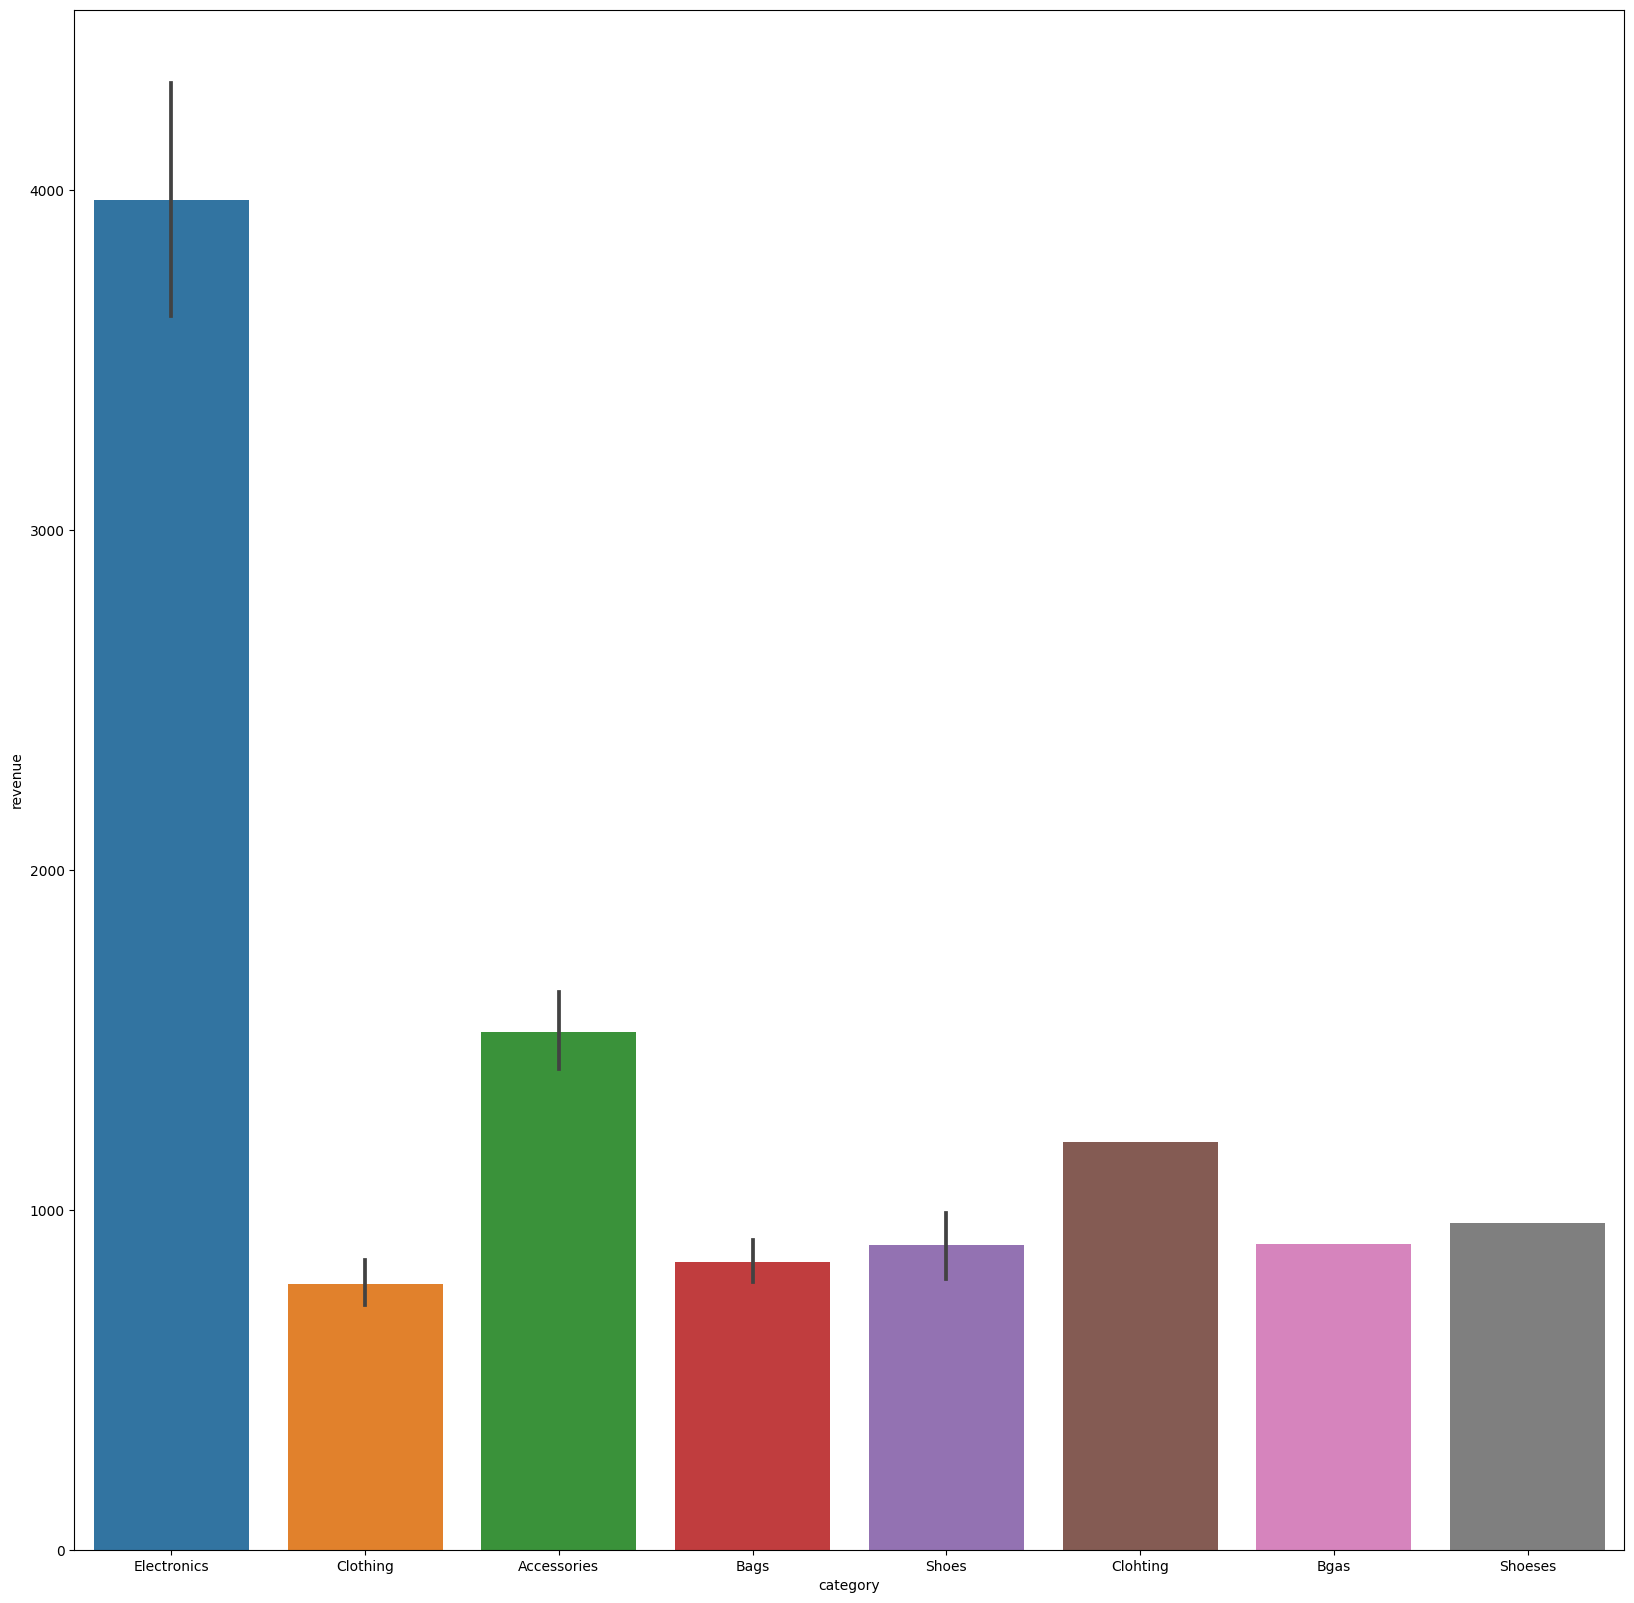

In [127]:
plt.figure(figsize=(20,20))

sns.barplot(x='category', y='revenue', data=df)

In [128]:
q_df3 = df[(df['category'] == 'Electronics')]
q_df3

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
6,2022-01-06,Smartphone,Electronics,600.0,8.0,4800.0
7,2022-01-06,Tablet,Electronics,400.0,5.0,2000.0
...,...,...,...,...,...,...
357,2022-12-20,Tablet,Electronics,400.0,6.0,2400.0
358,2022-12-21,Smartphone,Electronics,600.0,7.0,4200.0
363,2022-12-26,Smartphone,Electronics,600.0,9.0,5400.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0


In [129]:
q_df3['revenue'].sum()

516080.0

<Axes: xlabel='product', ylabel='revenue'>

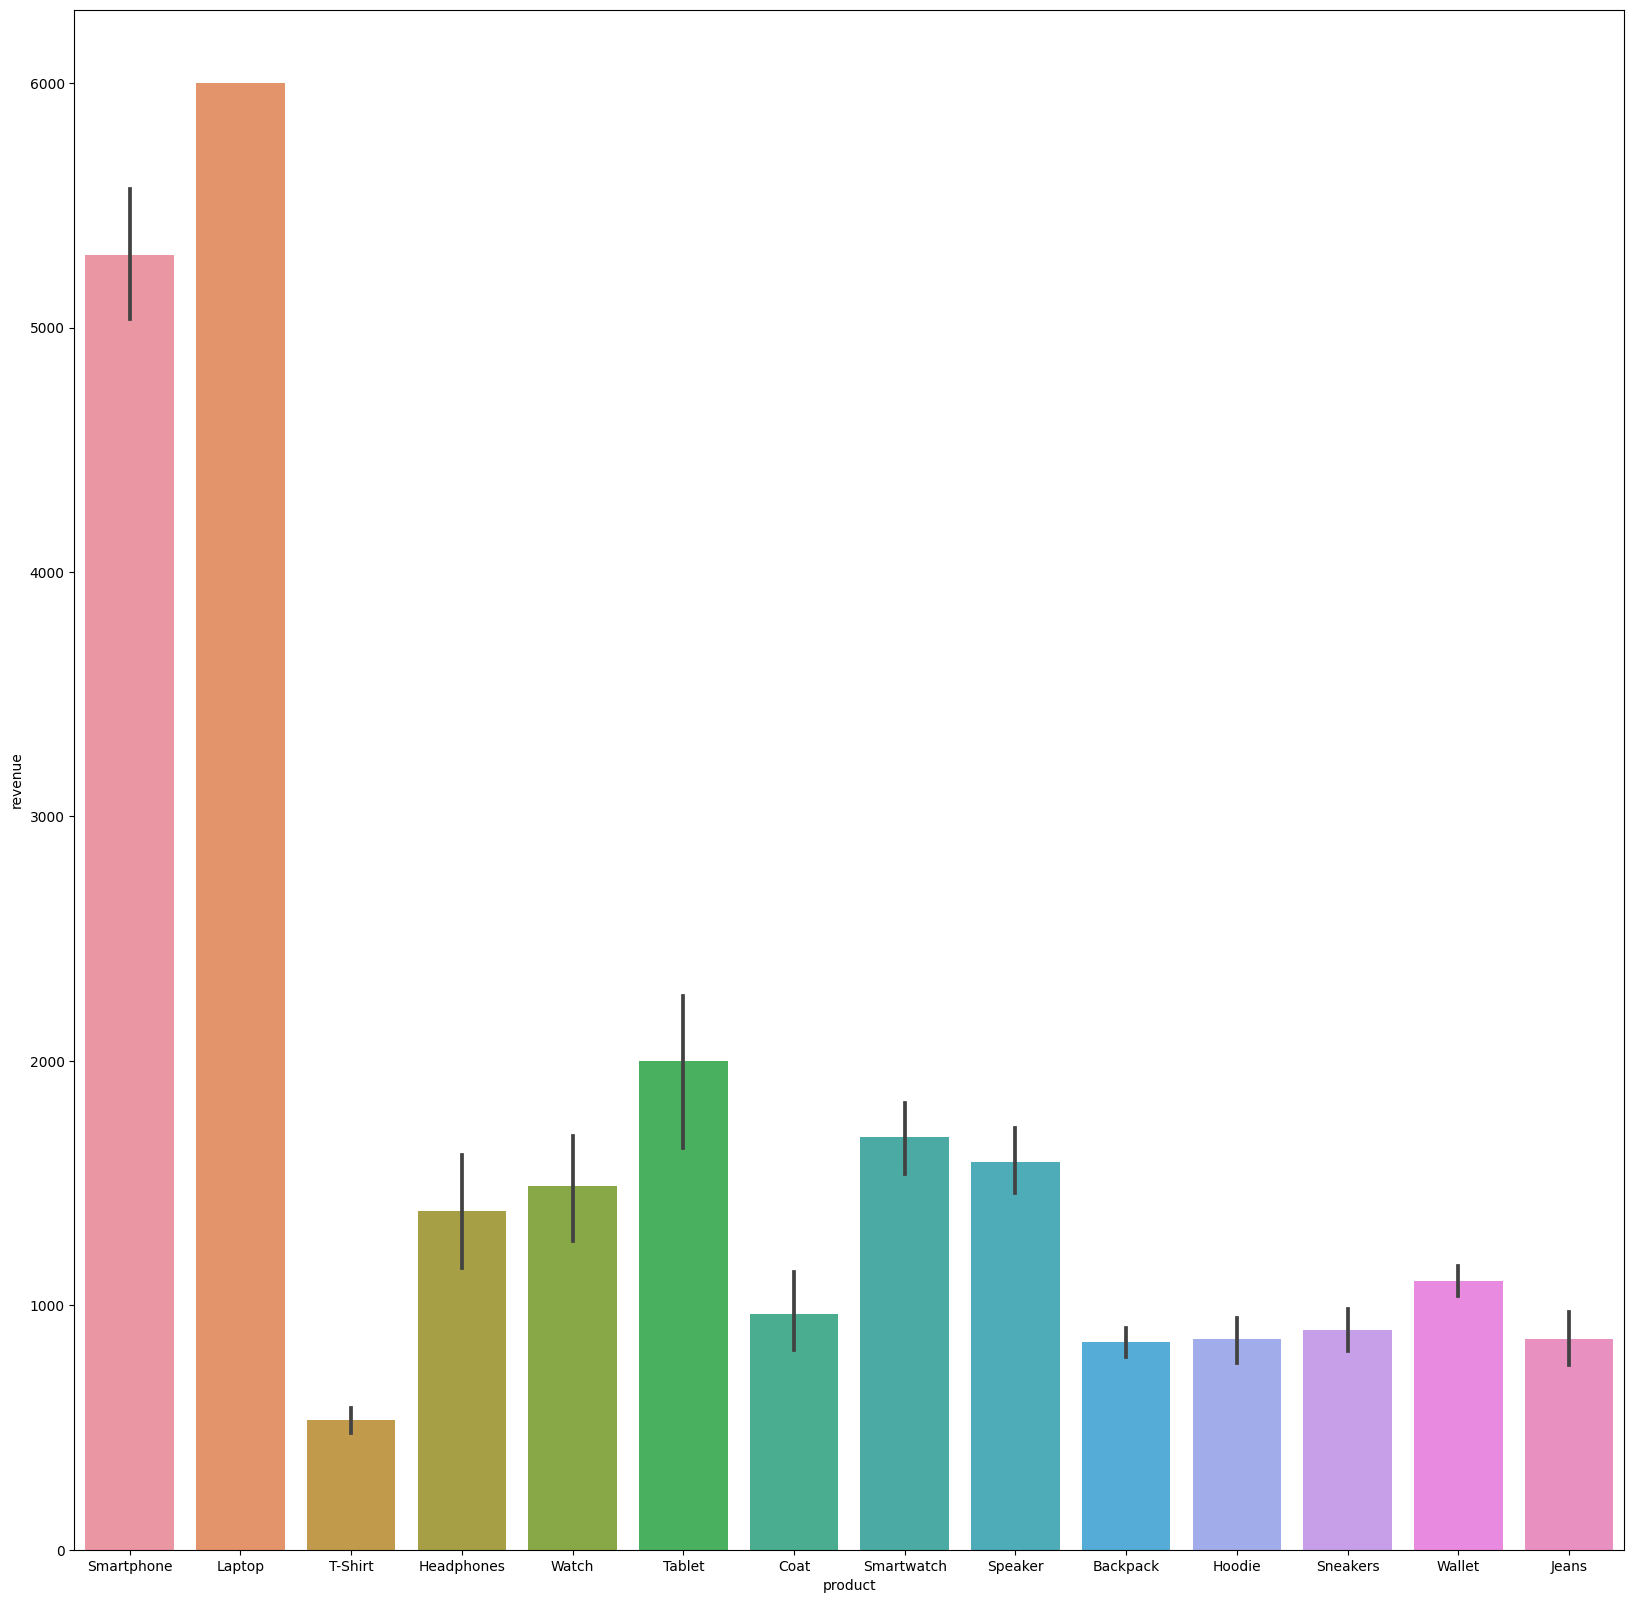

In [130]:
plt.figure(figsize=(20,20))

sns.barplot(x='product', y='revenue', data=df)

<Figure size 2000x2000 with 0 Axes>

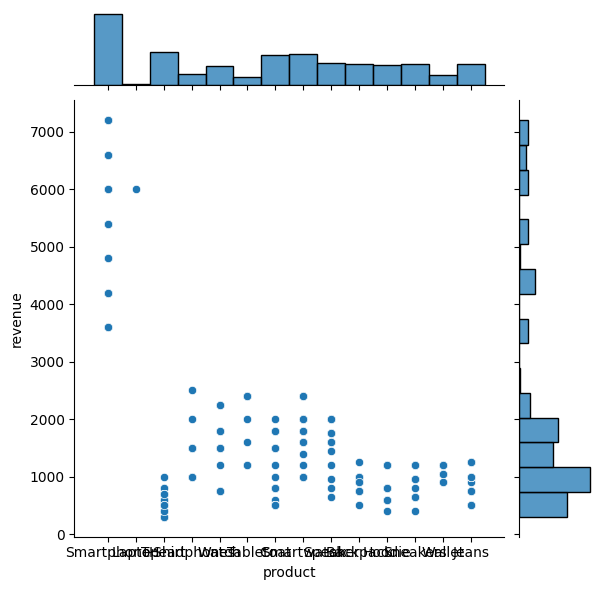

In [131]:
plt.figure(figsize=(20,20))

sns.jointplot(x='product',y='revenue',data=df)

<Figure size 2000x2000 with 0 Axes>

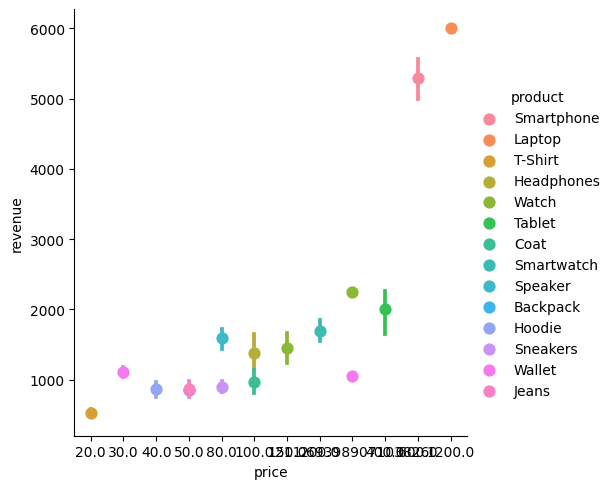

In [132]:
plt.figure(figsize=(20,20))

sns.catplot(x="price", y="revenue", hue='product', data=df, kind='point')

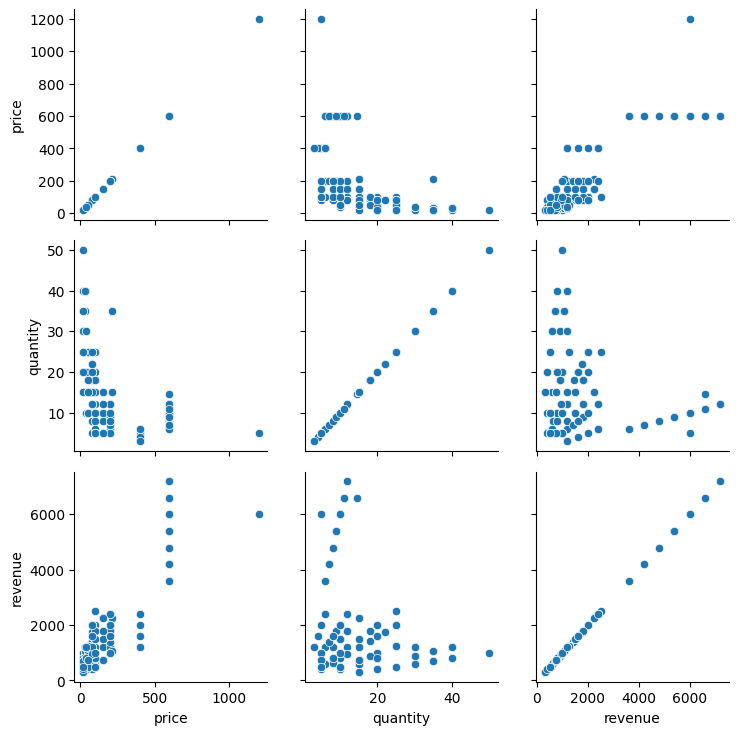

In [133]:
gg = sns.PairGrid(df)
gg.map(sns.scatterplot)

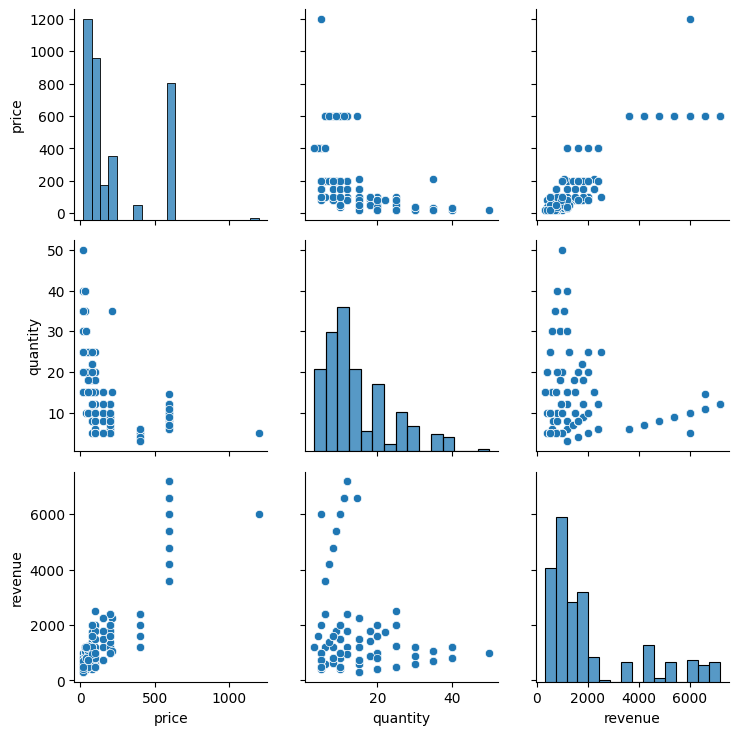

In [134]:
gd = sns.PairGrid(df)
gd.map_diag(sns.histplot)
gd.map_offdiag(sns.scatterplot)

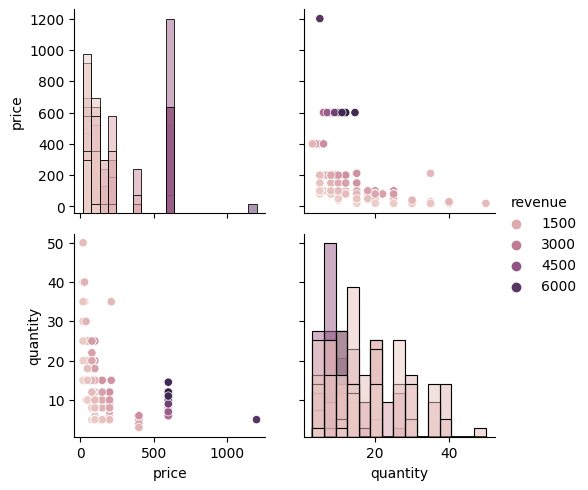

In [135]:
gf = sns.PairGrid(df, hue="revenue")
gf.map_diag(sns.histplot)
gf.map_offdiag(sns.scatterplot)
gf.add_legend()

<Figure size 2000x2000 with 0 Axes>

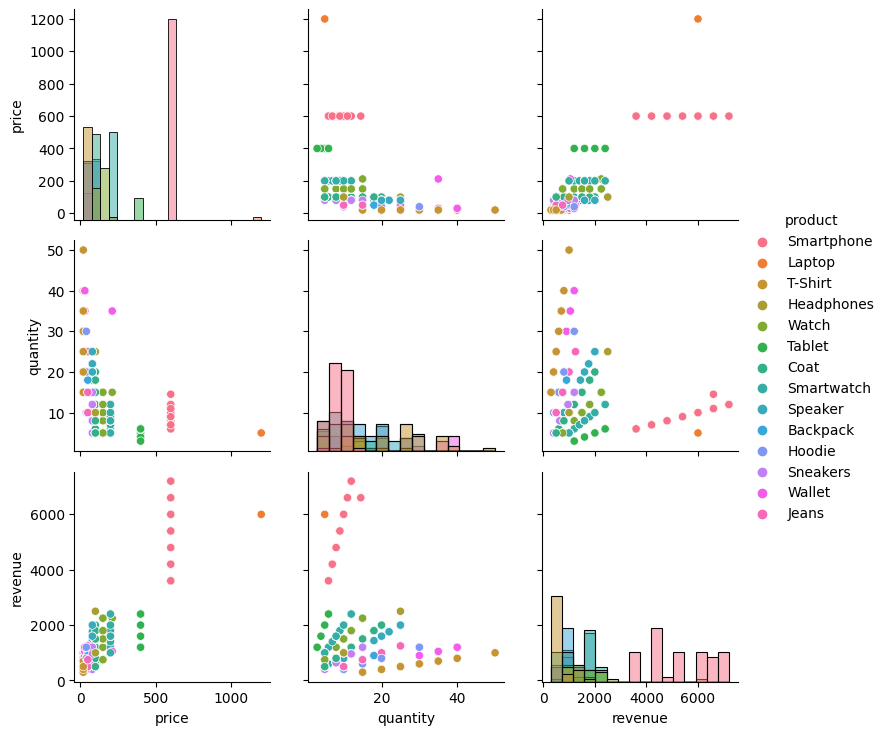

In [136]:
plt.figure(figsize=(20,20))

gc = sns.PairGrid(df, hue="product")
gc.map_diag(sns.histplot)
gc.map_offdiag(sns.scatterplot)
gc.add_legend()

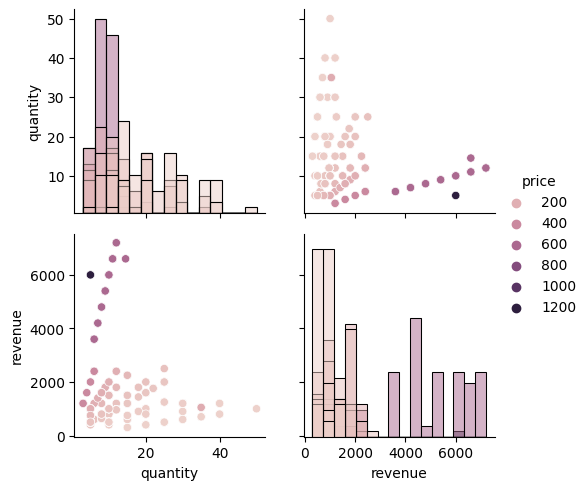

In [137]:
gc = sns.PairGrid(df, hue="price")
gc.map_diag(sns.histplot)
gc.map_offdiag(sns.scatterplot)
gc.add_legend()

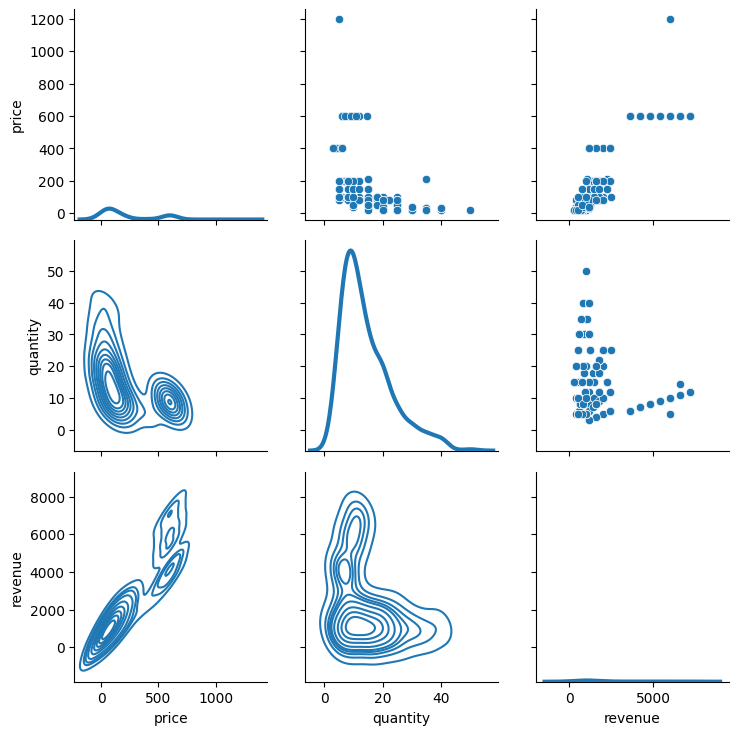

In [138]:
gs = sns.PairGrid(df)
gs.map_upper(sns.scatterplot)
gs.map_lower(sns.kdeplot)
gs.map_diag(sns.kdeplot, lw=3, legend=False)

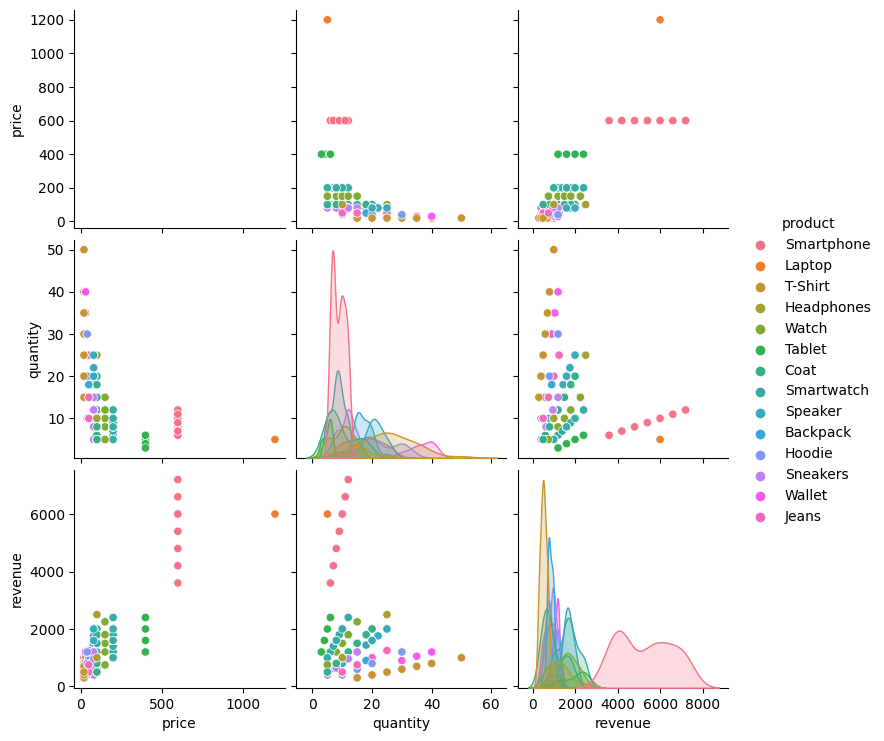

In [139]:
sns.pairplot(data, hue="product", height=2.5)

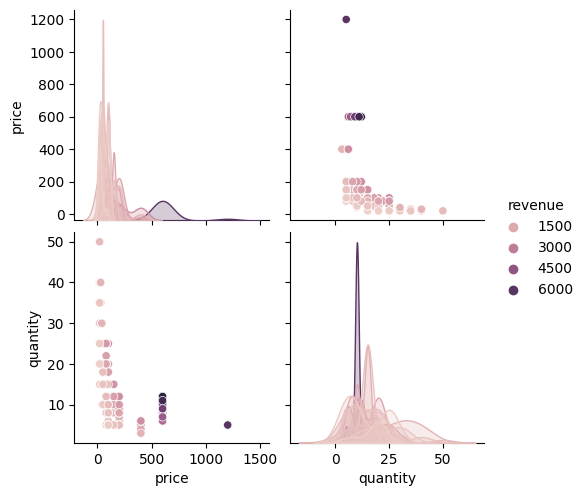

In [140]:
sns.pairplot(data, hue="revenue", height=2.5)

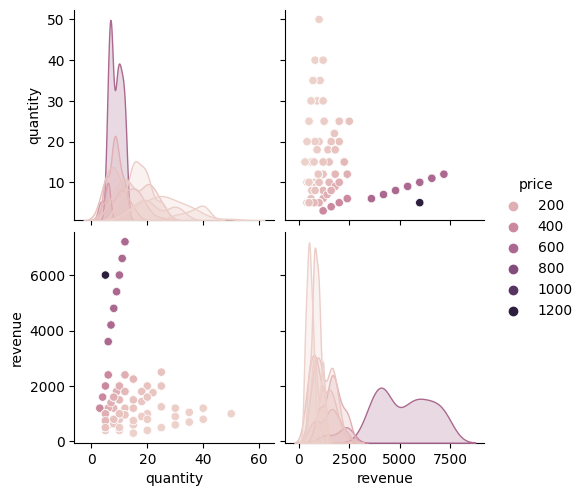

In [141]:
sns.pairplot(data, hue="price", height=2.5)

## 7- What was the total revenue generated in each quarter of the year?

### Tuning

In [142]:
# Extract month from datetime column in Pandas
df['MonthNum'] = df['date'].dt.month

In [143]:
df

,date,product,category,price,quantity,revenue,MonthNum
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0,1
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0,1
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0,1
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0,1
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0,1
...,...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0,12
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0,12
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0,12
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0,12


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 368
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      368 non-null    datetime64[ns]
 1   product   368 non-null    object        
 2   category  368 non-null    object        
 3   price     368 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
 6   MonthNum  368 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 23.0+ KB


### Q1

In [145]:
filtered_df = df[(df['MonthNum'] <= 3)]
filtered_df

,date,product,category,price,quantity,revenue,MonthNum
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0,1
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0,1
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0,1
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0,1
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0,1
...,...,...,...,...,...,...,...
87,2022-03-27,Smartphone,Electronics,600.0,9.0,5400.0,3
88,2022-03-28,Watch,Accessories,150.0,10.0,1500.0,3
89,2022-03-29,Coat,Clothing,100.0,5.0,500.0,3
90,2022-03-30,Headphones,Electronics,100.0,10.0,1000.0,3


In [146]:
filtered_df['revenue'].sum()

182100.0

### Q2

In [147]:
filtered_df2 = df[(df['MonthNum'] > 3) & (df['MonthNum'] <= 6)]
filtered_df2

,date,product,category,price,quantity,revenue,MonthNum
92,2022-04-01,Hoodie,Clothing,40.0,30.0,1200.0,4
93,2022-04-02,Smartphone,Electronics,600.0,10.0,6000.0,4
94,2022-04-03,Speaker,Electronics,80.0,25.0,2000.0,4
95,2022-04-04,Coat,Clothing,100.0,15.0,1500.0,4
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,2000.0,4
...,...,...,...,...,...,...,...
178,2022-06-26,Jeans,Clothing,50.0,15.0,750.0,6
179,2022-06-27,Smartphone,Electronics,600.0,9.0,5400.0,6
180,2022-06-28,Watch,Accessories,150.0,10.0,1500.0,6
181,2022-06-29,Coat,Clothing,100.0,5.0,500.0,6


In [148]:
filtered_df2['revenue'].sum()

185970.0

### Q3

In [149]:
filtered_df3 = df[(df['MonthNum'] > 6) & (df['MonthNum'] <= 9)]
filtered_df3

,date,product,category,price,quantity,revenue,MonthNum
183,2022-07-01,Smartphone,Electronics,600.0,11.0,6600.0,7
184,2022-07-02,Hoodie,Clothing,40.0,20.0,800.0,7
185,2022-07-03,Smartphone,Electronics,600.0,10.0,6000.0,7
186,2022-07-04,Speaker,Electronics,80.0,22.0,1760.0,7
187,2022-07-05,Coat,Clothing,100.0,18.0,1800.0,7
...,...,...,...,...,...,...,...
270,2022-09-26,Smartphone,Electronics,600.0,9.0,5400.0,9
271,2022-09-27,Watch,Accessories,150.0,5.0,750.0,9
272,2022-09-28,Coat,Clothing,100.0,5.0,500.0,9
273,2022-09-29,Headphones,Electronics,100.0,10.0,1000.0,9


In [150]:
filtered_df3['revenue'].sum()

197680.0

### Q4

In [151]:
filtered_df4 = df[(df['MonthNum'] >9)]
filtered_df4

,date,product,category,price,quantity,revenue,MonthNum
276,2022-10-01,Hoodie,Clothing,40.0,30.0,1200.0,10
277,2022-10-02,Smartphone,Electronics,600.0,10.0,6000.0,10
278,2022-10-03,Speaker,Electronics,80.0,25.0,2000.0,10
279,2022-10-04,Coat,Clothing,100.0,15.0,1500.0,10
280,2022-10-05,Smartwatch,Accessories,200.0,10.0,2000.0,10
...,...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0,12
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0,12
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0,12
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0,12


In [152]:
filtered_df4['revenue'].sum()

193380.0